# Generating Sample Data from Distributions
Then treating data as if they were samples of real data

* https://github.com/ijmbarr/causalgraphicalmodels
* https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
* https://en.wikipedia.org/wiki/Vehicular_metrics

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 16
mpl.rc('xtick', labelsize=15) 
mpl.rc('ytick', labelsize=15)

In [4]:
import pandas as pd
print(pd.__version__)

1.5.0


In [5]:
import numpy as np

In [6]:
from scipy.stats import skewnorm

In [7]:
import seaborn as sns

In [8]:
# !pip install causalgraphicalmodels

In [9]:
# https://github.com/ijmbarr/causalgraphicalmodels
# https://github.com/ijmbarr/causalgraphicalmodels/blob/master/notebooks/cgm-examples.ipynb
from causalgraphicalmodels import StructuralCausalModel

In [10]:
# https://en.wikipedia.org/wiki/Vehicular_metrics

braking_distance_mean = 40
braking_distance_std = 5
power_mean = 100
power_std = 50

car_safety_model = StructuralCausalModel({
    "emergency_braking": lambda n_samples: np.random.binomial(1, p=0.60, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_braking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_braking - \
                             # having a braking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1)
})

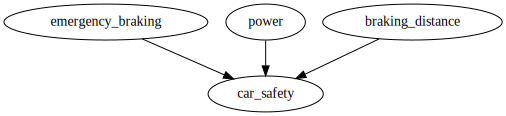

In [11]:
car_safety_model.cgm.draw()

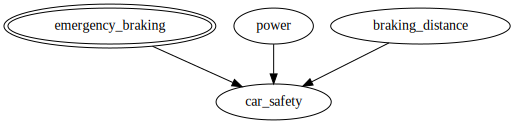

In [12]:
car_safety_model_do_emergency_braking = car_safety_model.do("emergency_braking")

car_safety_model_do_emergency_braking.cgm.draw()

In [13]:
car_safety_model.cgm.get_distribution()

'P(emergency_braking)P(braking_distance)P(power)P(car_safety|emergency_braking,braking_distance,power)'

In [14]:
n_samples=10_000
# data = car_safety_model_do_emergency_braking.sample(n_samples=n_samples, 
#                                                      set_values={"emergency_braking": np.ones(n_samples)})
data = car_safety_model.sample(n_samples=n_samples)
data.head()

emergency_braking  braking_distance       power  car_safety
0                  1         45.343595  156.452340   -1.254432
1                  1         40.533994  142.853182    0.077272
2                  0         43.531323   98.341614   -0.833926
3                  1         46.520958   69.248206   -1.014176
4                  1         34.180524  188.453353    0.438359

In [15]:
braking_distance = 31.983544

In [16]:
(braking_distance - braking_distance_mean) / braking_distance_std

-1.6032912000000004

In [17]:
power = 50

In [18]:
abs(power - power_mean) / power_std

1.0

In [19]:
data.describe()

emergency_braking  braking_distance         power    car_safety
count       10000.000000      10000.000000  10000.000000  10000.000000
mean            0.604200         40.055572    136.207770     -0.212659
std             0.489046          4.970268     34.853703      1.263088
min             0.000000         22.951108     30.079916     -5.276636
25%             0.000000         36.690360    111.437278     -1.041465
50%             1.000000         40.036007    133.897684     -0.184391
75%             1.000000         43.422481    158.151208      0.662682
max             1.000000         58.751907    284.630819      4.148357

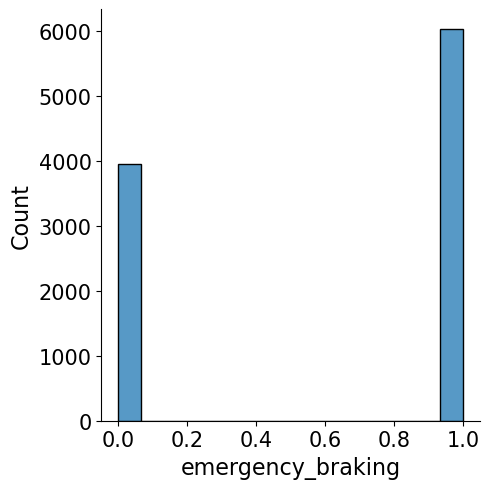

In [20]:
sns.displot(data["emergency_braking"]);

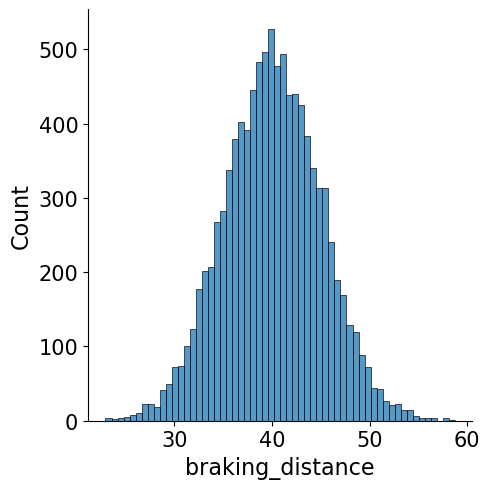

In [21]:
sns.displot(data["braking_distance"]);

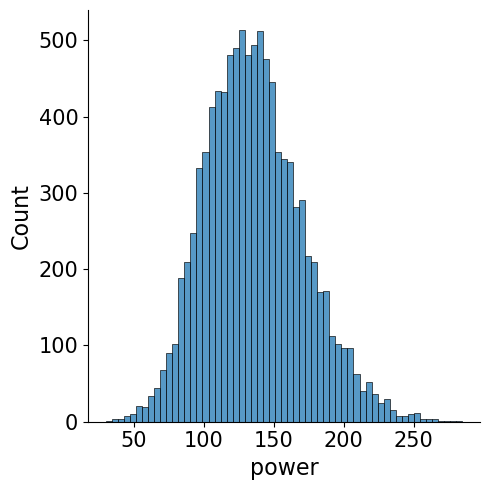

In [22]:
sns.displot(data["power"]);

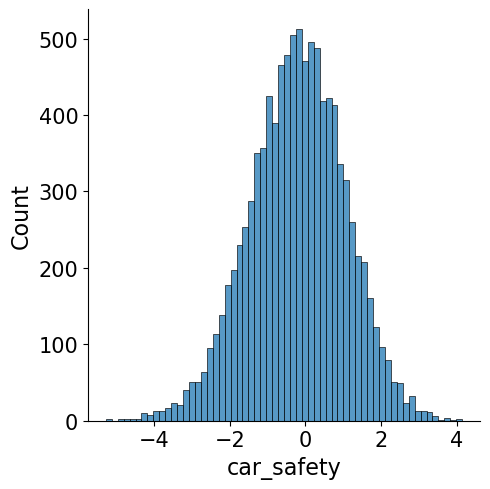

In [23]:
sns.displot(data["car_safety"]);

In [24]:
# sns.kdeplot?

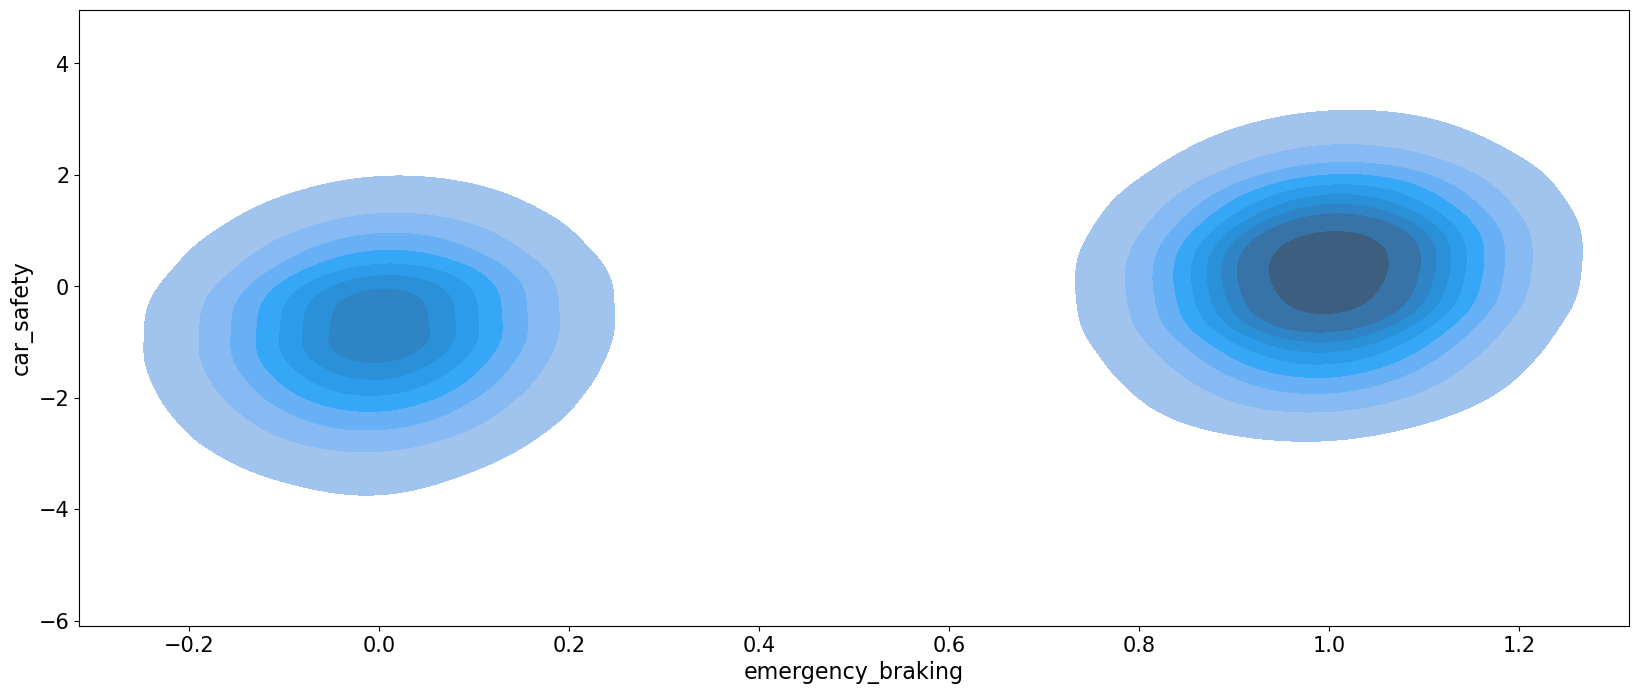

In [25]:
sns.kdeplot(
    x=data["emergency_braking"],
    y=data["car_safety"],
    fill=True
);

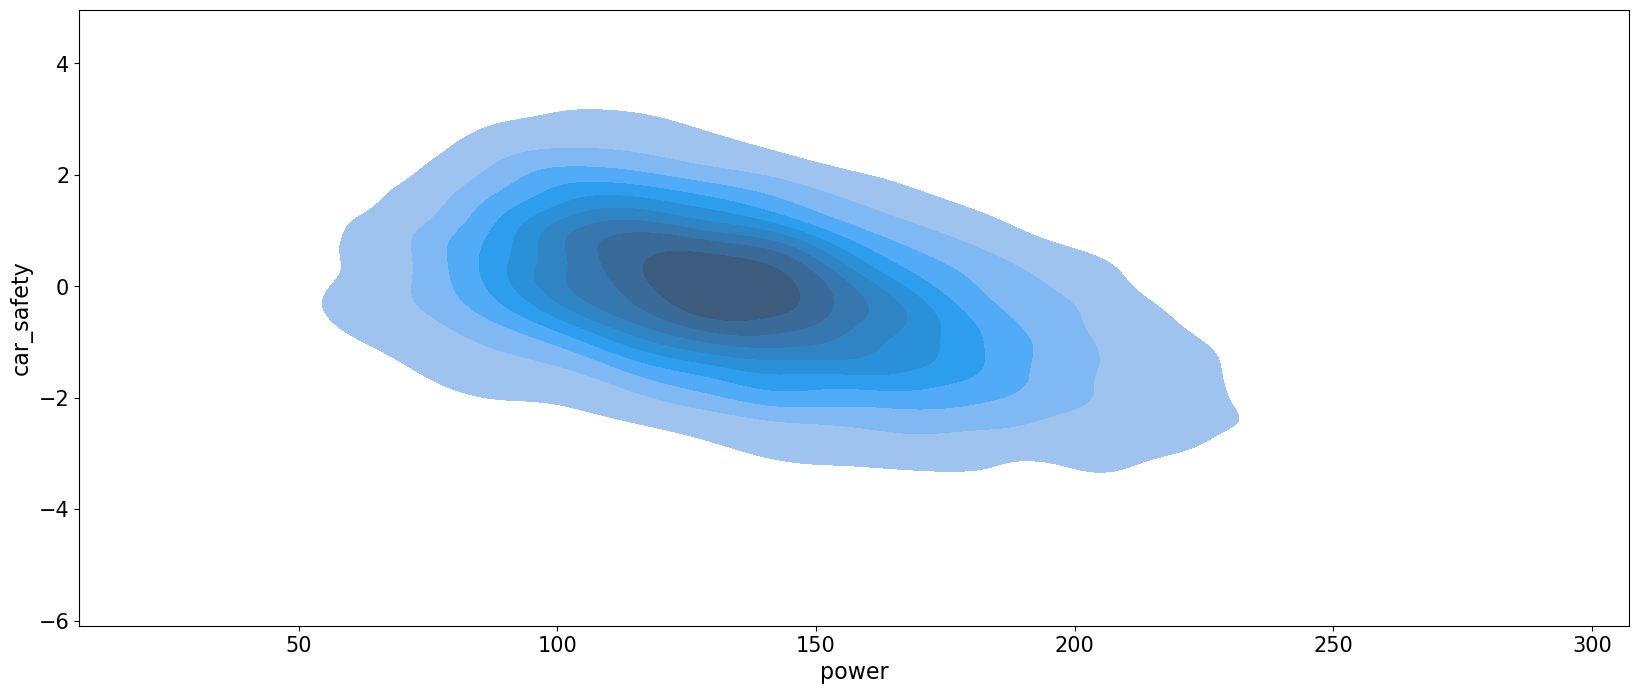

In [26]:
sns.kdeplot(
    x=data["power"],
    y=data["car_safety"],
    fill=True
);

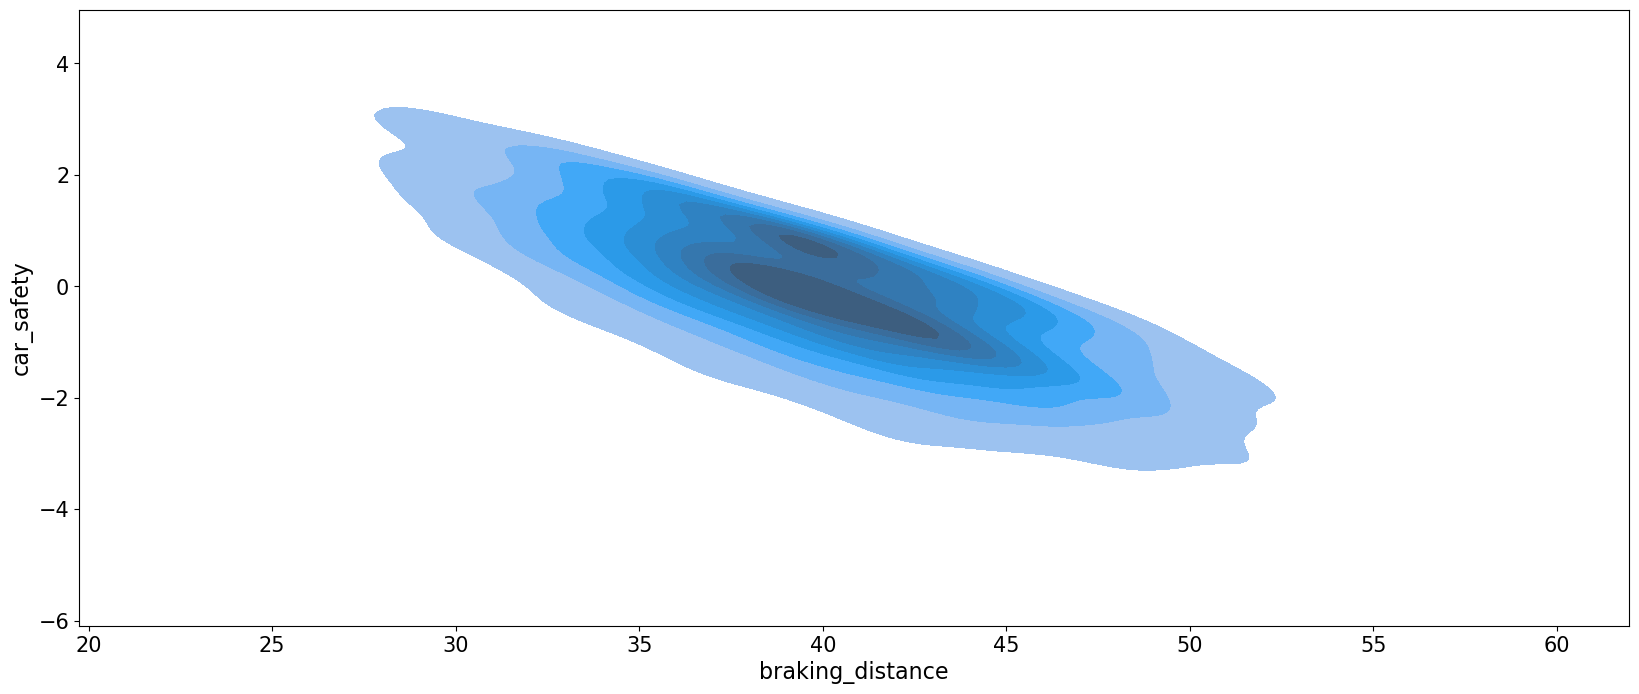

In [27]:
sns.kdeplot(
    x=data["braking_distance"],
    y=data["car_safety"],
    fill=True
);

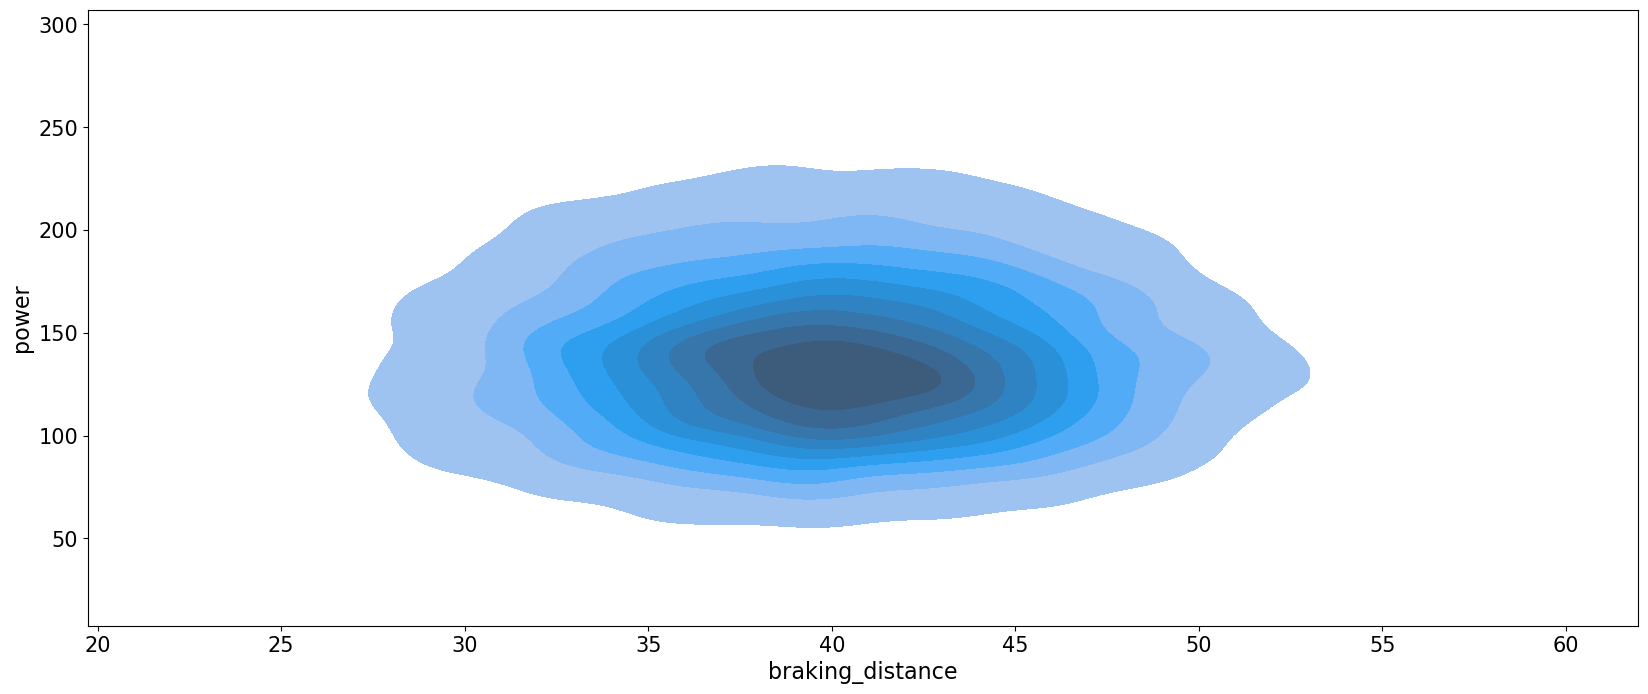

In [28]:
sns.kdeplot(
    x=data["braking_distance"],
    y=data["power"],
    fill=True
);

In [29]:
from scipy.stats import pearsonr


In [30]:
# pearsonr?

In [31]:
r, p_value = pearsonr(data['braking_distance'], data['power'])
# The p-value roughly indicates the probability of an uncorrelated system
# producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.
r, p_value

(0.0005141806336619852, 0.9589975103549362)

In [32]:
r, p_value = pearsonr(data['braking_distance'], data['car_safety'])
r, p_value

(-0.7850214215243572, 0.0)

In [33]:
r, p_value = pearsonr(data['power'], data['car_safety'])
r, p_value

(-0.43949812325121124, 0.0)

# Driver's ability

age distribution: https://www.destatis.de/DE/Themen/Gesellschaft-Umwelt/Bevoelkerung/Bevoelkerungsstand/Tabellen/bevoelkerung-altersgruppen-deutschland.html

(16, 100, 34.7176, 13.410542503567855, 10000)

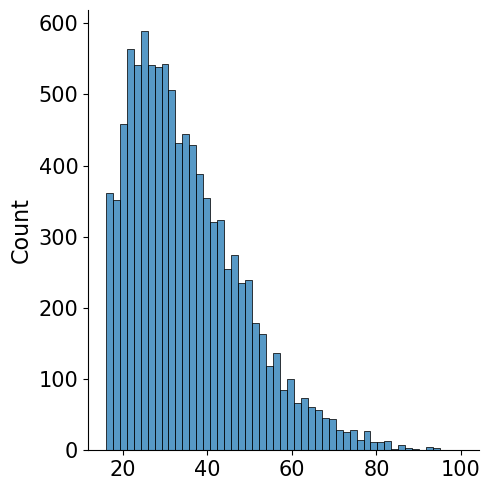

In [34]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [35]:
driver_ability_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    "age": lambda n_samples: skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1)})

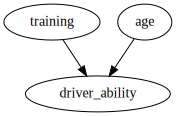

In [36]:
driver_ability_model.cgm.draw()

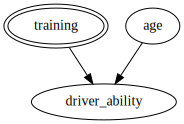

In [37]:
driver_ability_model_with_training = driver_ability_model.do("training")

driver_ability_model_with_training.cgm.draw()

In [38]:
driver_ability_model.cgm.get_distribution()

'P(training)P(age)P(driver_ability|training,age)'

In [39]:
n_samples=10_000
data = driver_ability_model.sample(n_samples=n_samples)
data.head()

training        age  driver_ability
0         0  49.287641       -0.761951
1         0  52.661563       -0.782160
2         0  26.852111       -0.364686
3         0  83.168714       -2.319995
4         0  29.565860       -0.066408

In [40]:
age = 80

In [41]:
# abs(age - age_skewed_mean) / age_skewed_std
# more balanced
abs(age - age_skewed_mean) / age_std

2.058290909090909

In [42]:
data.describe()

training           age  driver_ability
count  10000.000000  10000.000000    10000.000000
mean       0.195300     35.367002       -0.277751
std        0.396451     13.059222        0.546855
min        0.000000     14.226020       -3.736773
25%        0.000000     25.063307       -0.592761
50%        0.000000     32.864001       -0.330856
75%        0.000000     43.108311       -0.057577
max        1.000000    114.728098        1.269125

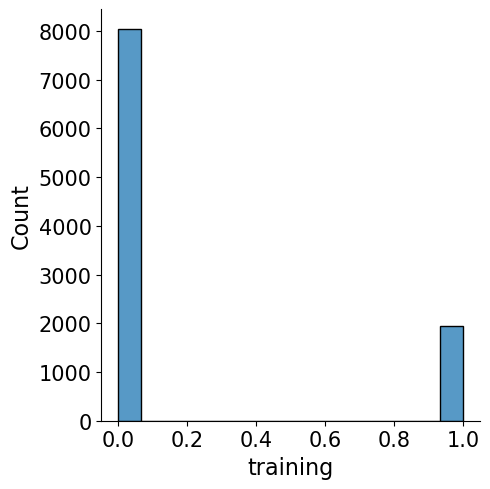

In [43]:
sns.displot(data["training"]);

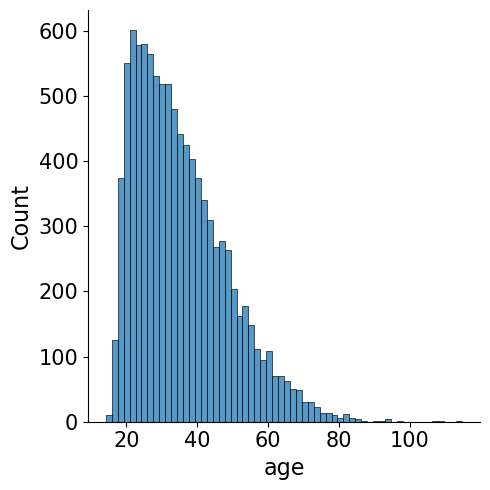

In [44]:
sns.displot(data["age"]);

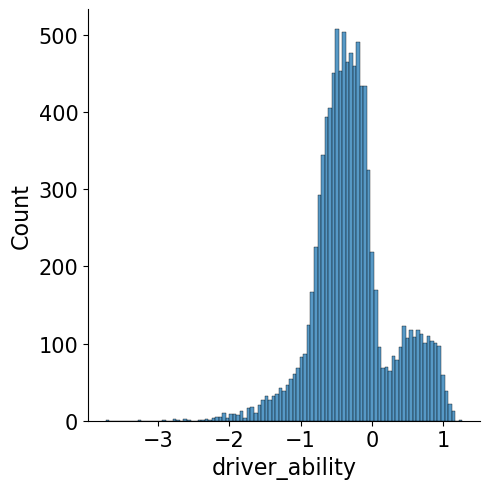

In [45]:
sns.displot(data["driver_ability"]);

In [46]:
# sns.kdeplot?

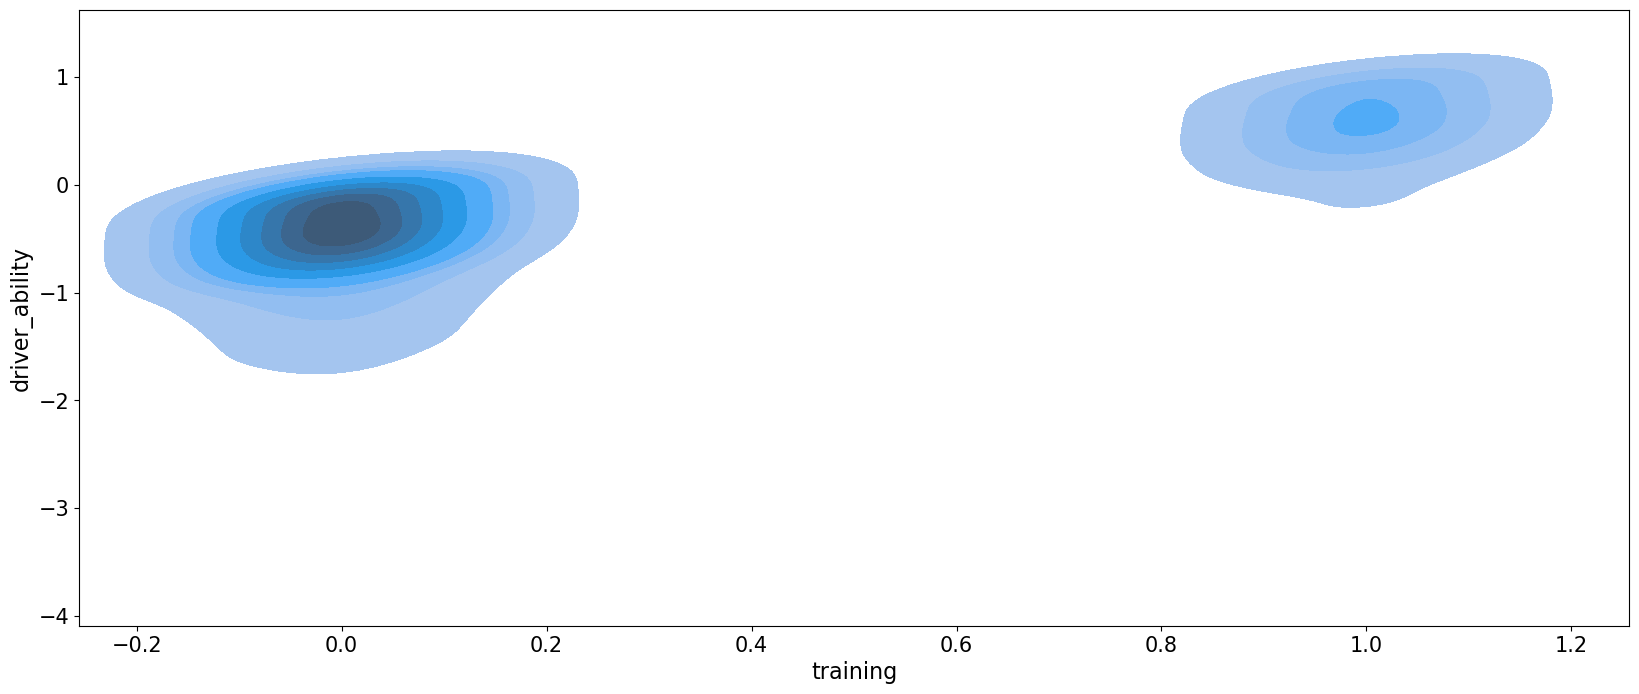

In [47]:
sns.kdeplot(
    x=data["training"],
    y=data["driver_ability"],
    fill=True
);

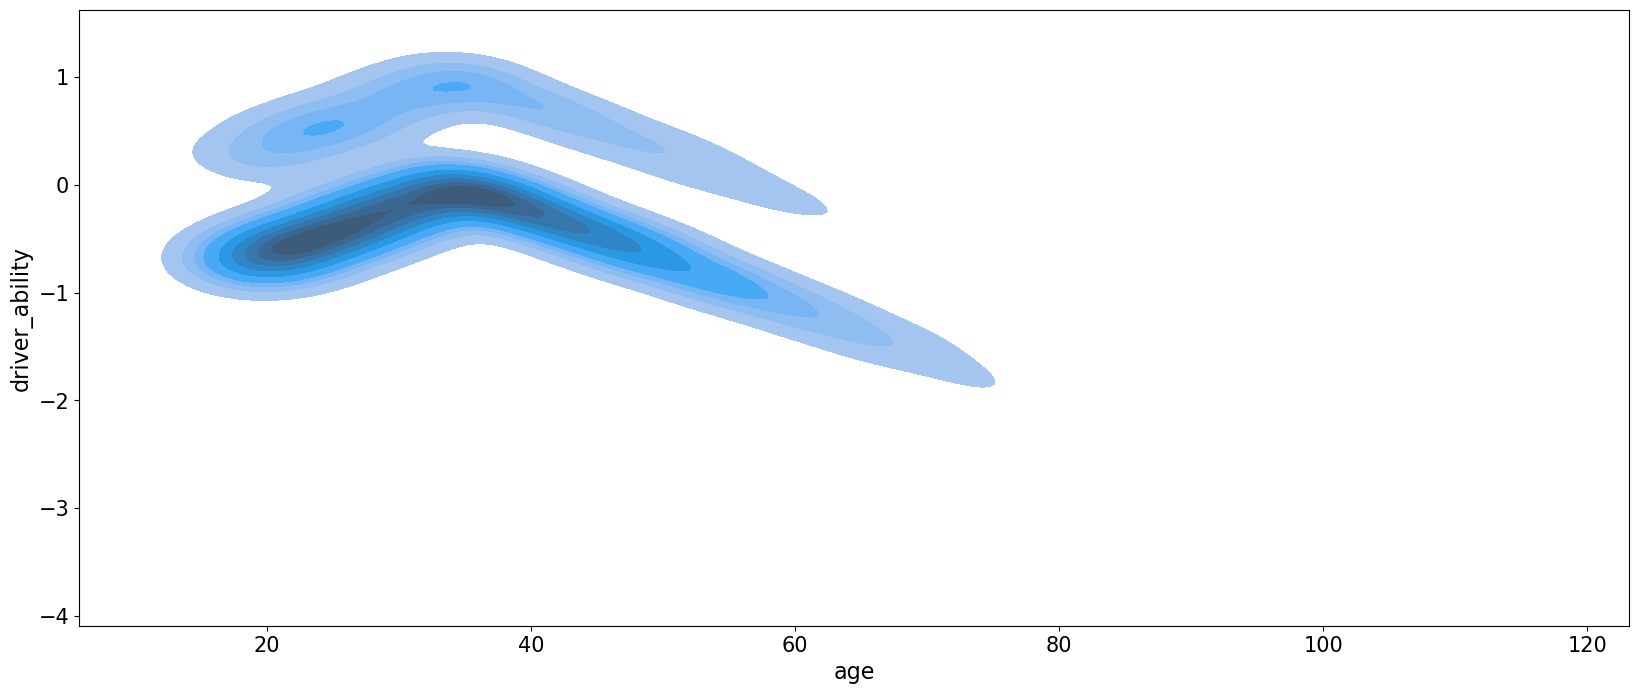

In [48]:
sns.kdeplot(
    x=data["age"],
    y=data["driver_ability"],
    fill=True
);

In [49]:
r, p_value = pearsonr(data['age'], data['driver_ability'])
r, p_value

(-0.3410193722872982, 9.142254487911916e-271)

In [50]:
r, p_value = pearsonr(data['training'], data['driver_ability'])
r, p_value

(0.7325992607290969, 0.0)

In [51]:
r, p_value = pearsonr(data['training'], data['age'])
r, p_value

(-0.010780119924142462, 0.2810745691388779)

# Combined risk model

In [52]:
from sklearn.preprocessing import normalize

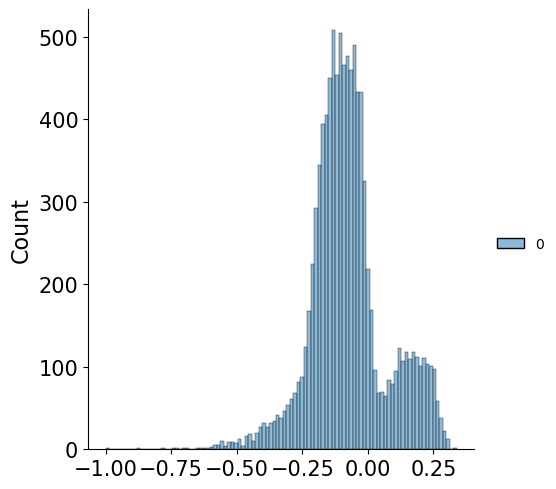

In [53]:
ability = normalize(data['driver_ability'].values.reshape(-1, 1), axis=0, norm='max')
sns.displot(ability);

(18.984121455755144, 203.42616465297877, 81.29725377050954, 25.529359293215396)

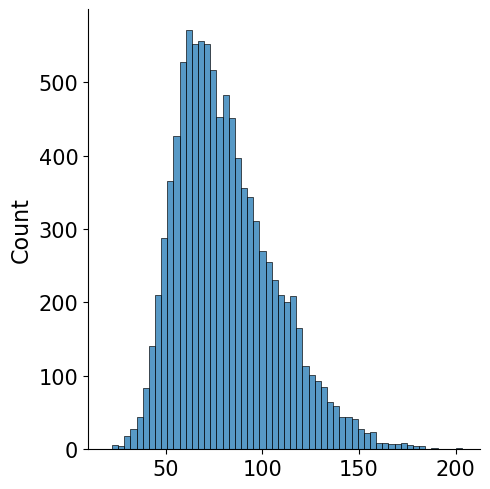

In [54]:
miles_mean = 50
miles_std = 40

x = skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples)
sns.displot(x);
miles_skewed_mean = x.mean()
miles_skewed_std = x.std()

x.min(), x.max(), miles_skewed_mean, miles_skewed_std

In [55]:
risk_model = StructuralCausalModel({
    "ability": lambda n_samples: driver_ability_model.sample(n_samples=n_samples)['driver_ability'], 
    "safety": lambda n_samples: car_safety_model.sample(n_samples=n_samples)['car_safety'],
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda ability, safety, miles, n_samples:
                # negative score is high risk
             - np.random.normal(loc=ability + \
                             safety -
                             # all deviation from good miles is negative
                             abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

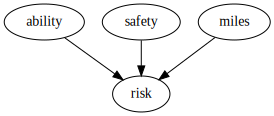

In [56]:
risk_model.cgm.draw()

In [57]:
n_samples=10_000
data = risk_model.sample(n_samples=n_samples)
data.head()

ability    safety      miles      risk
0 -0.590378 -0.003700  86.154385  1.536913
1 -0.023129  0.611715  64.165916 -0.235464
2 -0.560318  0.517893  76.018230  0.467868
3 -0.376149  0.509537  99.350676  0.944177
4 -0.247549 -0.507603  44.126673  0.843392

In [58]:
data.describe()

ability        safety         miles          risk
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      -0.276151     -0.194813     81.070663      1.273598
std        0.555712      1.253664     25.355469      1.506993
min       -3.600511     -5.729670     24.214059     -3.914120
25%       -0.595050     -1.030597     62.307367      0.234618
50%       -0.322920     -0.156826     76.943047      1.226914
75%       -0.046888      0.672992     95.925650      2.265388
max        1.205480      4.621034    195.502972      7.477477

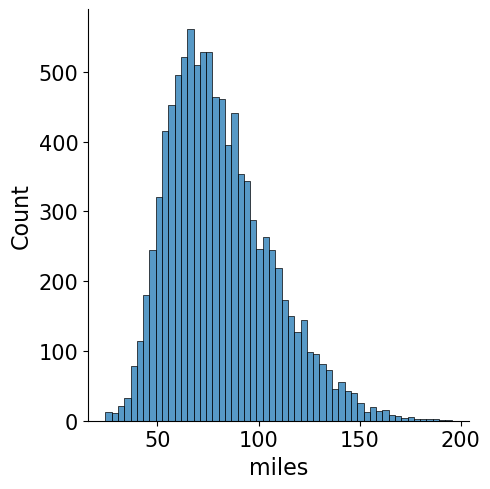

In [59]:
sns.displot(data["miles"]);

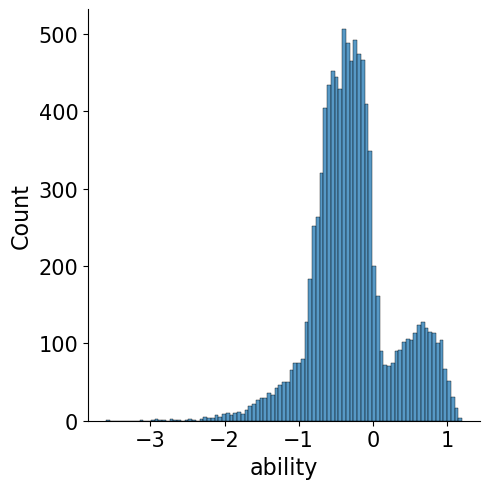

In [60]:
sns.displot(data["ability"]);

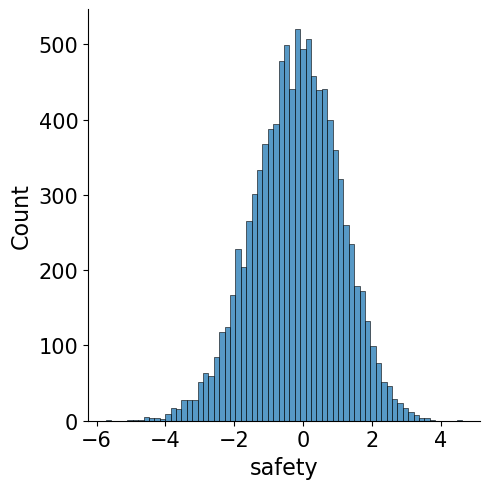

In [61]:
sns.displot(data["safety"]);

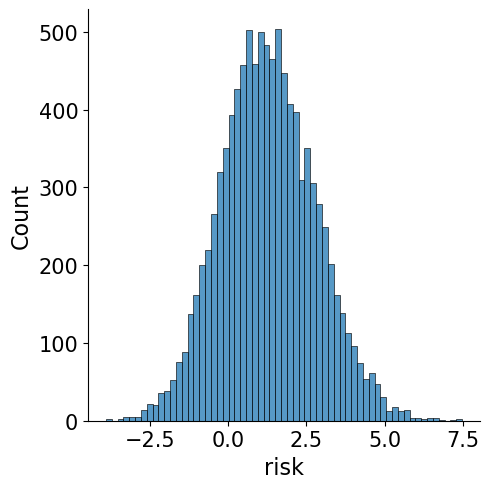

In [62]:
sns.displot(data["risk"]);

In [63]:
# sns.kdeplot?

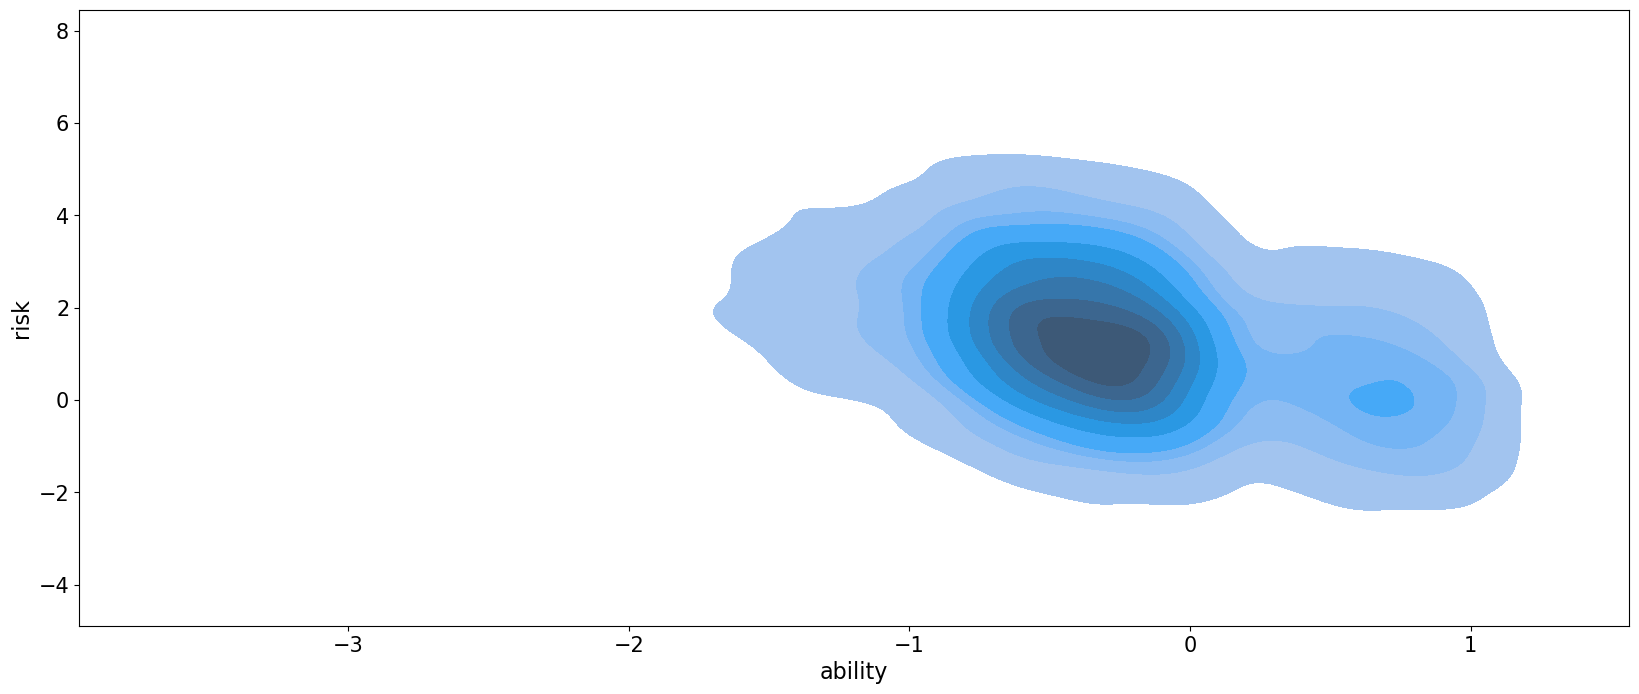

In [64]:
sns.kdeplot(
    x=data["ability"],
    y=data["risk"],
    fill=True
);

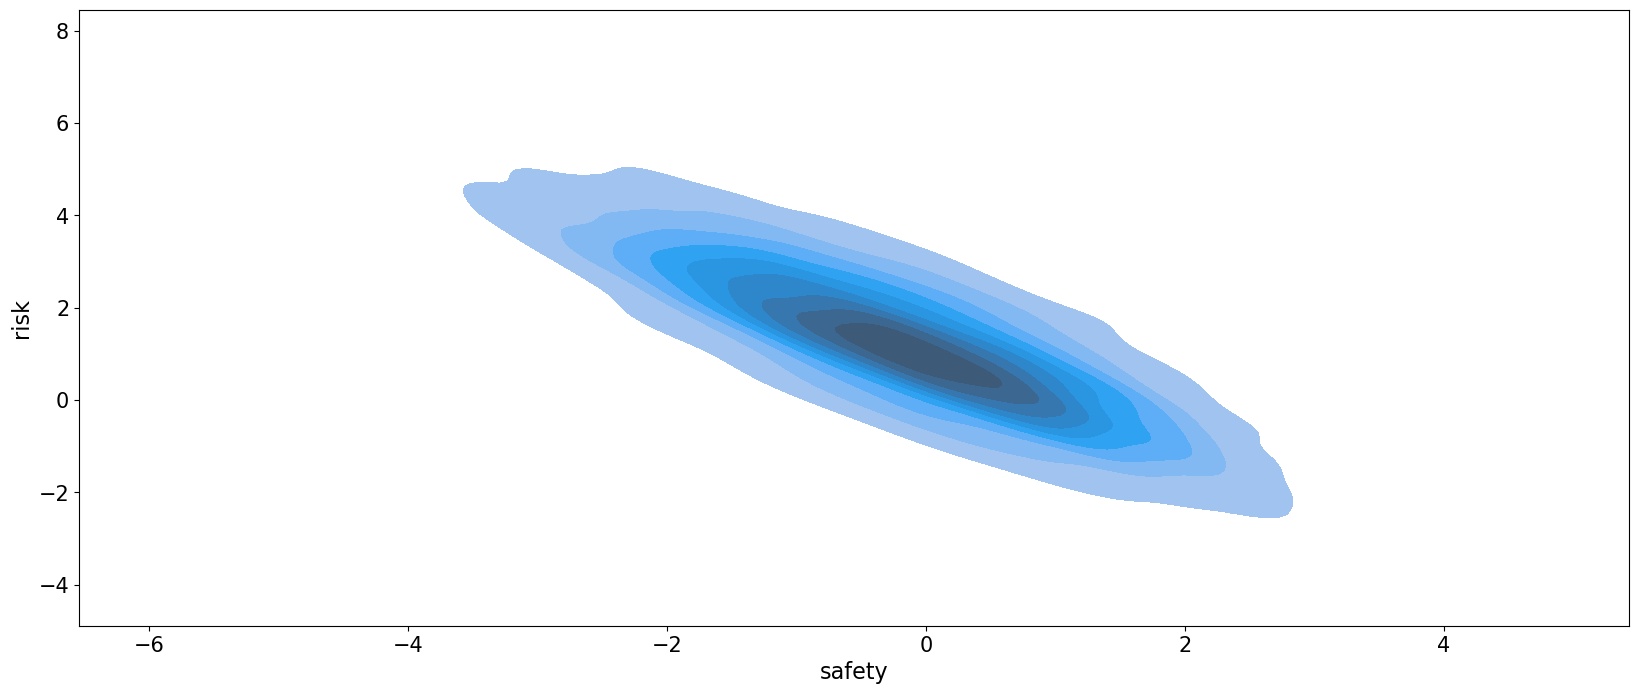

In [65]:
sns.kdeplot(
    x=data["safety"],
    y=data["risk"],
    fill=True
);

In [66]:
r, p_value = pearsonr(data['safety'], data['risk'])
r, p_value

(-0.8367110134420965, 0.0)

In [67]:
r, p_value = pearsonr(data['ability'], data['risk'])
r, p_value

(-0.3834522892169717, 0.0)

In [68]:
r, p_value = pearsonr(data['ability'], data['safety'])
r, p_value

(0.017692731161048678, 0.07686210376968051)

# Decomposed combined

(16, 100, 35.0478, 13.245350699773864, 10000)

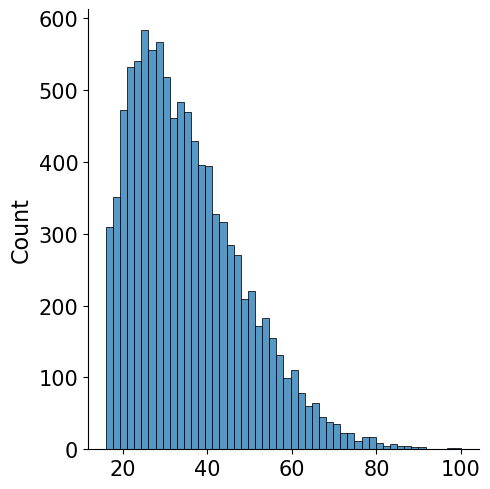

In [69]:
age_mean = 18
age_std = 22

x = skewnorm.rvs(a=8, loc=age_mean, scale=age_std, size=n_samples)
# hard clip leaves us with non constant amout of samples
# x = x[(x > 16) & (x < 100)] 
x = np.clip(x, a_min=16, a_max=100)
sns.displot(x);
x = x.astype(int)
age_skewed_mean = x.mean()
age_skewed_std = x.std()

x.min(), x.max(), age_skewed_mean, age_skewed_std, len(x)

In [70]:
# can be changed over time in favor of the car
# driver is overall more important than car
driver_weight = 4

risk_model = StructuralCausalModel({
    "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
#     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
    "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100),
    "driver_ability": \
        lambda training, age, n_samples: 
            np.random.normal(loc=training - \
                             # all deviation from good age is negative
                             # using unskwed mean makes this a bit more balanaced
                             abs(age - age_skewed_mean) / age_std, \
                             scale=0.1),
    "emergency_braking": lambda n_samples: np.random.binomial(1, p=0.40, size=n_samples), 
    "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
    "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
    "car_safety": \
        lambda emergency_braking, braking_distance, power, n_samples: \
            np.random.normal(loc=emergency_braking - \
                             # having a braking distance below average is negative, so we have to subtract
                             (braking_distance - braking_distance_mean) / braking_distance_std - \
                             # all deviation from good amount of power is negative
                             abs(power - power_mean) / power_std, \
                             scale=0.1),
    "miles": lambda n_samples: skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples),
    "risk": \
        lambda driver_ability, car_safety, miles, n_samples:
             # negative score is high risk
             - np.random.normal(loc=\
                             driver_ability * driver_weight\
                             + car_safety
                             # all deviation from good miles is negative
                             - abs(miles - miles_mean) / miles_std, \
                             scale=0.1)})

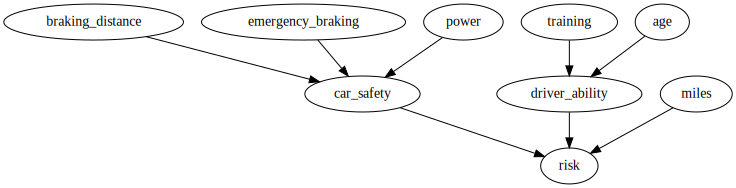

In [71]:
risk_model.cgm.draw()

In [72]:
# n_samples=10_000
n_samples=1_500
np.random.seed(42)
data = risk_model.sample(n_samples=n_samples)
data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

       miles  driver_ability  car_safety      risk  
0  55.990778       -1.753505    0.803182  6.286816  
1  92.431499       -0.419918   -0.958545  3.763487  
2  93.712797       -0.659023    0.670282  3.053520  
3  96.785658       -1.043172   -0.821925  6.249575  
4  75.892419       -0.246415   -0.077803  1.777616

In [73]:
data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power        miles  driver_ability   car_safety         risk  
count  1500.000000  1500.000000     1500.000000  1500.000000  1500.000000  
mean    137.524885    80.026726       -0.265003    -0.396552     2.226272  
std      36.527189    24.438771        0.544728     1.273974     2.575393  
min      31.956980    24.258544       -2.367896    -4.755363    -6.229445  
25%     112.369662    62.155913       -0.592934    -1.242621     0.579552  
50%     134.053456    76.716717       -0.311812    -0.377730     2.334707  
75%     160.117914    93.728268       -0.020392     0.495051     3.806040  
max     281.197004   180.794608        1.168014     3.637374    13.335634

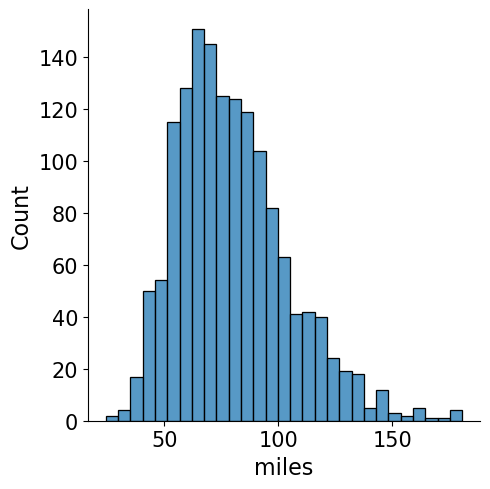

In [74]:
sns.displot(data["miles"]);

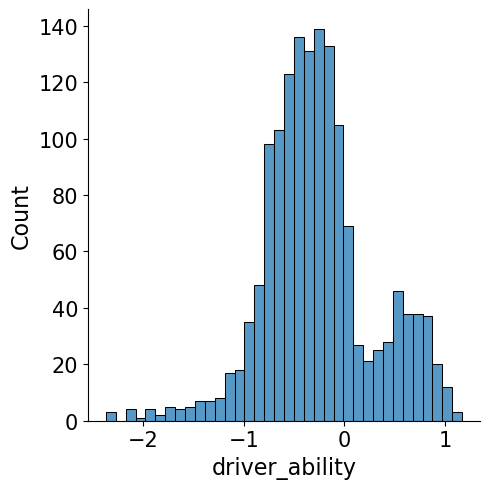

In [75]:
sns.displot(data["driver_ability"]);

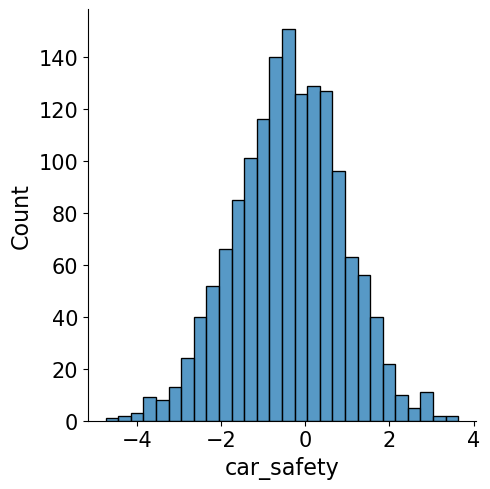

In [76]:
sns.displot(data["car_safety"]);

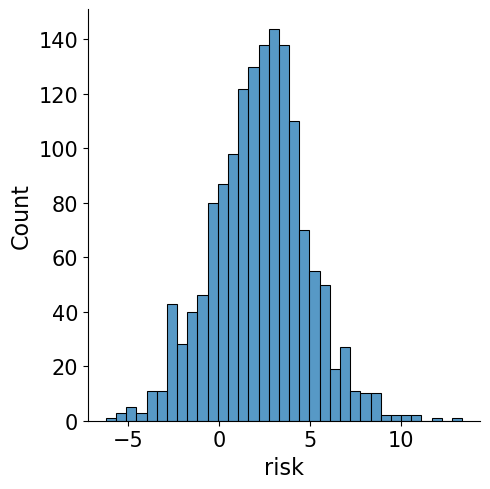

In [77]:
sns.displot(data["risk"]);

In [78]:
# sns.kdeplot?

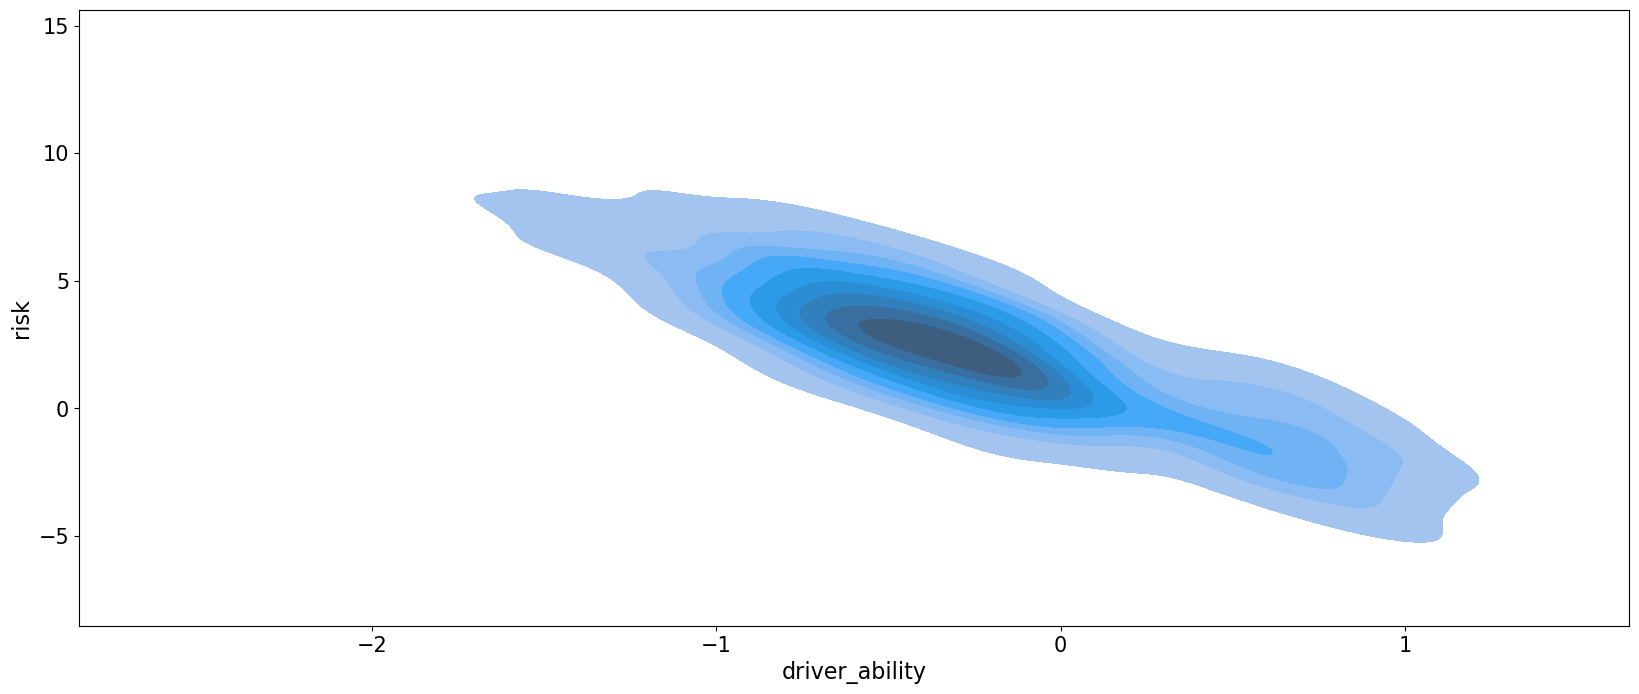

In [79]:
sns.kdeplot(
    x=data["driver_ability"],
    y=data["risk"],
    fill=True
);

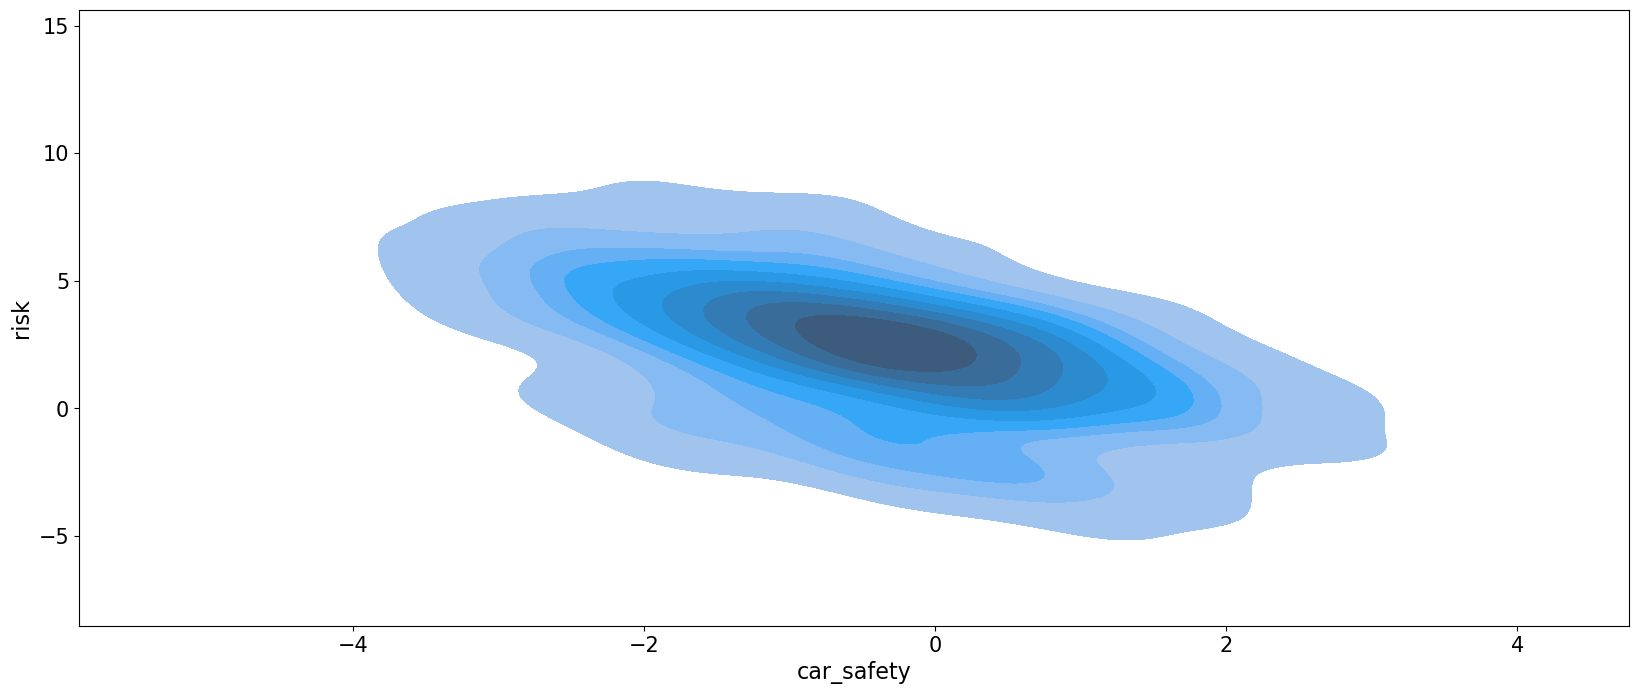

In [80]:
sns.kdeplot(
    x=data["car_safety"],
    y=data["risk"],
    fill=True
);

In [81]:
r, p_value = pearsonr(data['car_safety'], data['risk'])
r, p_value

(-0.49518196276794074, 1.2951382230782537e-93)

In [82]:
r, p_value = pearsonr(data['driver_ability'], data['risk'])
r, p_value

(-0.836182852643604, 0.0)

In [83]:
r, p_value = pearsonr(data['driver_ability'], data['car_safety'])
r, p_value

(-0.00287134617793097, 0.9115257246869324)

# Preparation of Dataset

In [84]:
data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

       miles  driver_ability  car_safety      risk  
0  55.990778       -1.753505    0.803182  6.286816  
1  92.431499       -0.419918   -0.958545  3.763487  
2  93.712797       -0.659023    0.670282  3.053520  
3  96.785658       -1.043172   -0.821925  6.249575  
4  75.892419       -0.246415   -0.077803  1.777616

In [85]:
GREEN = 2
YELLOW = 1
RED = 0

In [86]:
features = ['training', 'age', 'emergency_braking', 'braking_distance', 'power', 'miles', 'risk']

In [87]:
# preprocessed_data = data[['driver_ability', 'car_safety', 'miles', 'risk']]
preprocessed_data = data[features]
# preprocessed_data = data.copy()
preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
preprocessed_data['group_name'] = 'medium'
preprocessed_data['group'] = YELLOW
preprocessed_data.head()

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   

       miles      risk group_name  group  
0  55.990778  0.471430     medium      1  
1  92.431499  0.282213     medium      1  
2  93.712797  0.228974     medium      1  
3  96.785658  0.468637     medium      1  
4  75.892419  0.133298     medium      1

In [88]:
preprocessed_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power        miles         risk   group  
count  1500.000000  1500.000000  1500.000000  1500.0  
mean    137.524885    80.026726     0.166942     1.0  
std      36.527189    24.438771     0.193121     0.0  
min      31.956980    24.258544    -0.467128     1.0  
25%     112.369662    62.155913     0.043459     1.0  
50%     134.053456    76.716717     0.175073     1.0  
75%     160.117914    93.728268     0.285404     1.0  
max     281.197004   180.794608     1.000000     1.0

In [89]:
# balanced? imbalanced?
low_risk_threshold = preprocessed_data['risk'].quantile(.45)
# low_risk_threshold = preprocessed_data['risk'].quantile(.4)
# low_risk_threshold = preprocessed_data['risk'].quantile(.35)
# low_risk_threshold = preprocessed_data['risk'].quantile(.3333)
# low_risk_threshold = preprocessed_data['risk'].quantile(.50)
low_risk_threshold

0.15007663996678602

In [90]:
# high_risk_threshold = preprocessed_data['risk'].quantile(.6)
# high_risk_threshold = preprocessed_data['risk'].quantile(.65)
# high_risk_threshold = preprocessed_data['risk'].quantile(.6666)
high_risk_threshold = preprocessed_data['risk'].quantile(.55)
# high_risk_threshold = preprocessed_data['risk'].quantile(.75)
high_risk_threshold

0.19719982945499598

In [91]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])

In [92]:
preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

In [93]:
np.unique(preprocessed_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([675, 675, 150]))

In [94]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])

In [95]:
preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])

In [96]:
preprocessed_data.head(10)

training        age  emergency_braking  braking_distance       power  \
0         0  74.493138                  1         38.264068  122.527184   
1         1  67.074261                  0         43.854011  115.367900   
2         0  47.691471                  0         34.730823  126.498658   
3         0  55.429717                  0         42.139072  125.629252   
4         0  41.088408                  1         31.490489  241.447458   
5         0  69.693872                  0         37.193310  167.797457   
6         0  49.558664                  0         38.352553  164.678203   
7         1  28.690422                  0         48.374298  126.981076   
8         0  31.817048                  0         38.625988   95.699767   
9         0  37.597146                  1         28.993783  128.365608   

       miles      risk group_name  group  
0  55.990778  0.471430       high      0  
1  92.431499  0.282213       high      0  
2  93.712797  0.228974       high      0  
3  96.785658  0.468637       high      0  
4  75.892419  0.133298        low      2  
5  98.267345  0.592130       high      0  
6  65.638725  0.236226       high      0  
7  63.689887 -0.027262        low      2  
8  57.765999 -0.000168        low      2  
9  72.779806 -0.083024        low      2

In [97]:
preprocessed_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power        miles         risk     group  
count  1500.000000  1500.000000  1500.000000  1500.000  
mean    137.524885    80.026726     0.166942     1.000  
std      36.527189    24.438771     0.193121     0.949  
min      31.956980    24.258544    -0.467128     0.000  
25%     112.369662    62.155913     0.043459     0.000  
50%     134.053456    76.716717     0.175073     1.000  
75%     160.117914    93.728268     0.285404     2.000  
max     281.197004   180.794608     1.000000     2.000

In [98]:
labels = ["High Risk", "Medium Risk", "Low Risk"]
markers = ['v', 'd', '^']
# colors = ['#FF8080', '#FFFF80', '#8080FF']
colors = ['#FF0000', '#FFFF00', '#0000FF']

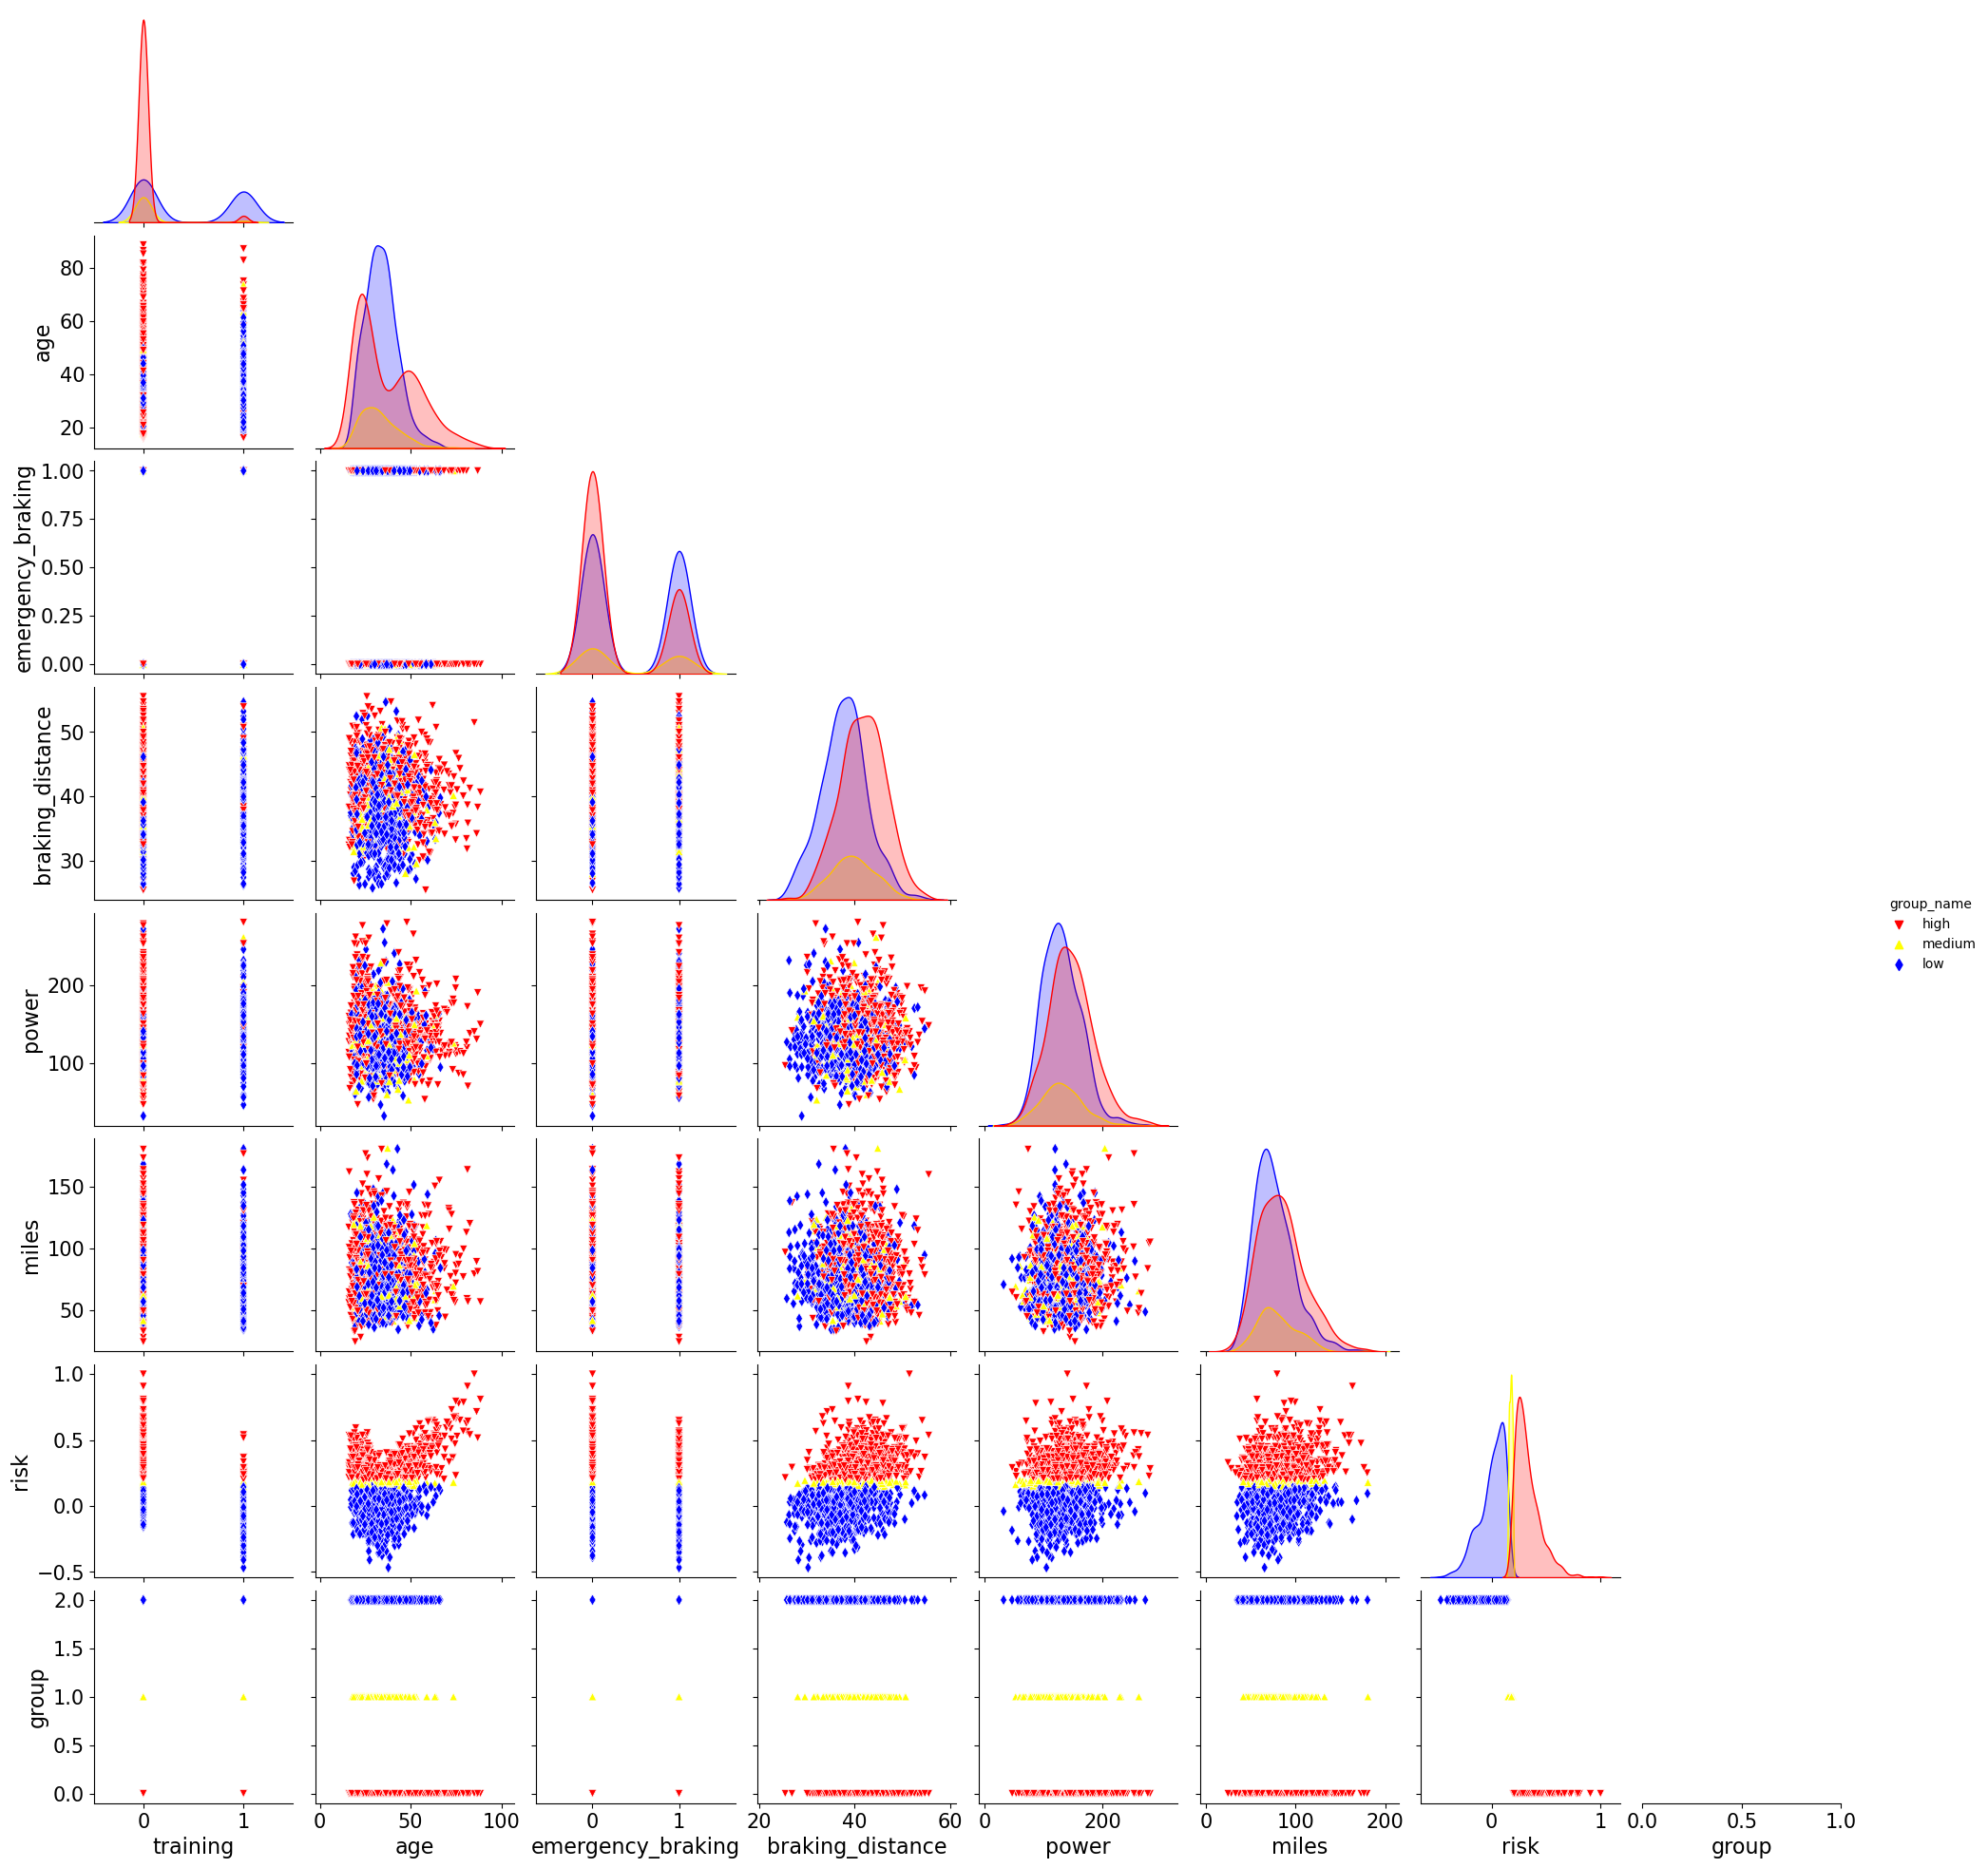

In [99]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# sns.pairplot(preprocessed_data, hue='group',  kind="kde";
 
sns.pairplot(preprocessed_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers);


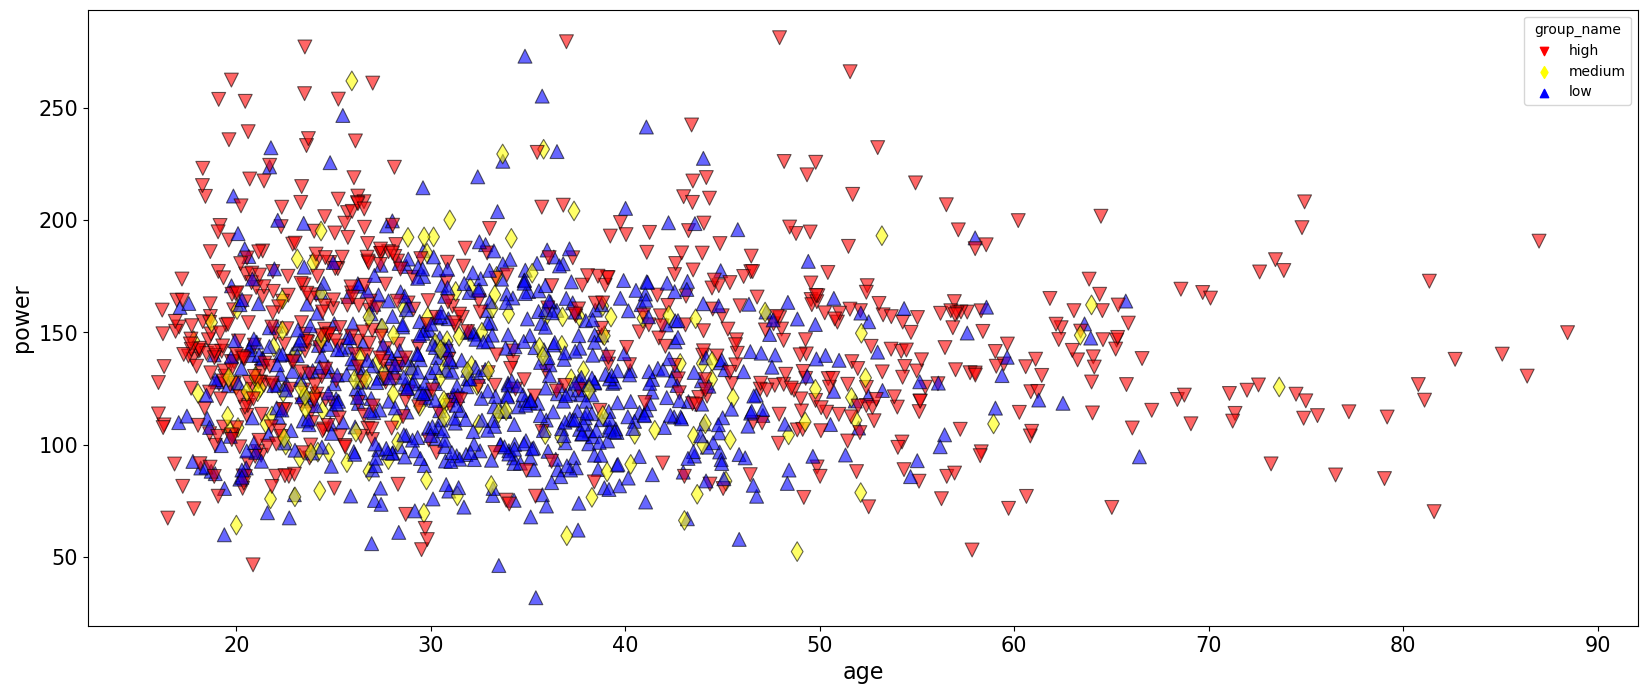

In [100]:
sns.scatterplot(x=preprocessed_data['age'], 
                y=preprocessed_data['power'], 
                hue=preprocessed_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=preprocessed_data['group_name'],
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [101]:
file_name = './model-based-1.csv'
preprocessed_data.to_csv(file_name, index=False, sep=';')

In [102]:
!ls

generate-causal.ipynb  month-15.csv  month-22.csv  month-3.csv	 month-4.csv
model-based-1.csv      month-16.csv  month-23.csv  month-30.csv  month-5.csv
month-1.csv	       month-17.csv  month-24.csv  month-31.csv  month-6.csv
month-10.csv	       month-18.csv  month-25.csv  month-32.csv  month-7.csv
month-11.csv	       month-19.csv  month-26.csv  month-33.csv  month-8.csv
month-12.csv	       month-2.csv   month-27.csv  month-34.csv  month-9.csv
month-13.csv	       month-20.csv  month-28.csv  month-35.csv  production.csv
month-14.csv	       month-21.csv  month-29.csv  month-36.csv  reference.csv


In [103]:
customers = pd.read_csv(file_name, sep=';')
customers.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.243806           0.384667         39.728535   
std       0.405532    13.193059           0.486679          5.108156   
min       0.000000    16.000000           0.000000         25.502431   
25%       0.000000    24.971581           0.000000         36.261921   
50%       0.000000    32.511926           0.000000         39.697162   
75%       0.000000    43.043168           1.000000         43.284010   
max       1.000000    88.456666           1.000000         55.491497   

             power        miles         risk     group  
count  1500.000000  1500.000000  1500.000000  1500.000  
mean    137.524885    80.026726     0.166942     1.000  
std      36.527189    24.438771     0.193121     0.949  
min      31.956980    24.258544    -0.467128     0.000  
25%     112.369662    62.155913     0.043459     0.000  
50%     134.053456    76.716717     0.175073     1.000  
75%     160.117914    93.728268     0.285404     2.000  
max     281.197004   180.794608     1.000000     2.000

# Story: Assistant systems get more and more important, bringing down weight on driver ability and bringing up braking systems over time 
* influence on driver ability can not be measured in input
* but inputs like age and assistant system

In [104]:
def generate_risk_data(driver_weight = 4.0, 
                       emergency_braking_fraction = 0.40,
                       age_drift = 0,
                       miles_drift = 0,
                       n_samples=1_500, 
                       seed=42,
#                        apply_norm=True,
                       apply_norm=False,
                       low_risk_threshold = 1.0,
                       high_risk_threshold = 3.0,
                      low_risk_quantile=.3333,
                      high_risk_quantile=.6666):
    risk_model = StructuralCausalModel({
        "training": lambda n_samples: np.random.binomial(1, p=0.20, size=n_samples), 
    #     "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100).astype(int),
        "age": lambda n_samples: np.clip(skewnorm.rvs(a=16, loc=age_mean, scale=age_std, size=n_samples), a_min=16, a_max=100) \
            + np.random.normal(age_drift, scale=0.1, size=n_samples),
        "driver_ability": \
            lambda training, age, n_samples: 
                np.random.normal(loc=training - \
                                 # all deviation from good age is negative
                                 # using unskwed mean makes this a bit more balanaced
                                 abs(age - age_skewed_mean) / age_std, \
                                 scale=0.1),
        "emergency_braking": lambda n_samples: np.random.binomial(1, p=emergency_braking_fraction, size=n_samples), 
        "braking_distance": lambda n_samples: np.random.normal(loc=braking_distance_mean, scale=braking_distance_std, size=n_samples),
        "power": lambda n_samples: skewnorm.rvs(a=2, loc=power_mean, scale=power_std, size=n_samples),
        "car_safety": \
            lambda emergency_braking, braking_distance, power, n_samples: \
                np.random.normal(loc=emergency_braking - \
                                 # having a braking distance below average is negative, so we have to subtract
                                 (braking_distance - braking_distance_mean) / braking_distance_std - \
                                 # all deviation from good amount of power is negative
                                 abs(power - power_mean) / power_std, \
                                 scale=0.1),
        "miles": lambda n_samples: np.clip(skewnorm.rvs(a=4, loc=miles_mean, scale=miles_std, size=n_samples) \
            + np.random.normal(miles_drift, scale=1, size=n_samples), a_min=5, a_max=None),
        "risk": \
            lambda driver_ability, car_safety, miles, n_samples:
                    # negative score is high risk
                    # driver is overall more important than car
                 - np.random.normal(loc=\
                                 driver_ability * driver_weight\
                                 + car_safety
                                 # all deviation from good miles is negative
                                 - abs(miles - miles_mean) / miles_std, \
                                 scale=0.1)})
    np.random.seed(seed)
    data = risk_model.sample(n_samples=n_samples)
    
    preprocessed_data = data[features]
    # preprocessed_data = data.copy()
    if apply_norm:
        preprocessed_data['risk'] = normalize(preprocessed_data['risk'].values.reshape(-1, 1), axis=0, norm='max')
    preprocessed_data['group_name'] = 'medium'
    preprocessed_data['group'] = YELLOW
    
    if low_risk_threshold is None:
        low_risk_threshold = preprocessed_data['risk'].quantile(low_risk_quantile)
        high_risk_threshold = preprocessed_data['risk'].quantile(high_risk_quantile)

    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] < low_risk_threshold, 'low', preprocessed_data['group_name'])
    preprocessed_data['group_name'] = np.where(preprocessed_data['risk'] > high_risk_threshold, 'high', preprocessed_data['group_name'])

    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'low', GREEN, preprocessed_data['group'])
    preprocessed_data['group'] = np.where(preprocessed_data['group_name'] == 'high', RED, preprocessed_data['group'])
    
    return preprocessed_data


In [105]:
generated_data = generate_risk_data()
generated_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.240226           0.370000         40.047327   
std       0.405532    13.191571           0.482965          5.292310   
min       0.000000    16.019190           0.000000         20.816722   
25%       0.000000    24.948022           0.000000         36.440032   
50%       0.000000    32.462481           0.000000         39.922413   
75%       0.000000    43.078459           1.000000         43.675832   
max       1.000000    88.425701           1.000000         57.645276   

             power        miles         risk        group  
count  1500.000000  1500.000000  1500.000000  1500.000000  
mean    134.393736    80.415974     2.248167     0.908000  
std      33.410677    25.536882     2.623534     0.823805  
min      45.272791    27.414000    -6.889825     0.000000  
25%     110.333073    61.828411     0.599273     0.000000  
50%     132.423028    76.275210     2.352085     1.000000  
75%     155.296864    95.114365     3.913414     2.000000  
max     257.983238   183.970662    12.286415     2.000000

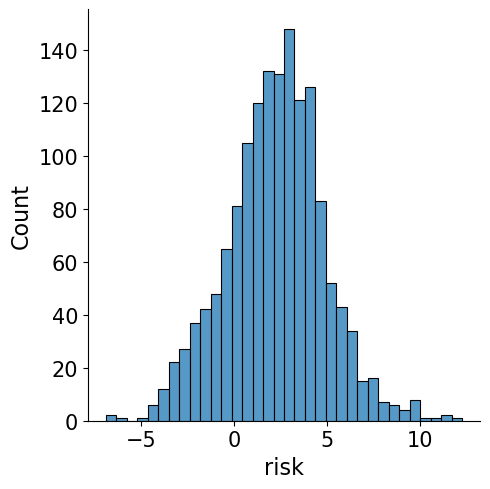

In [106]:
sns.displot(generated_data["risk"]);

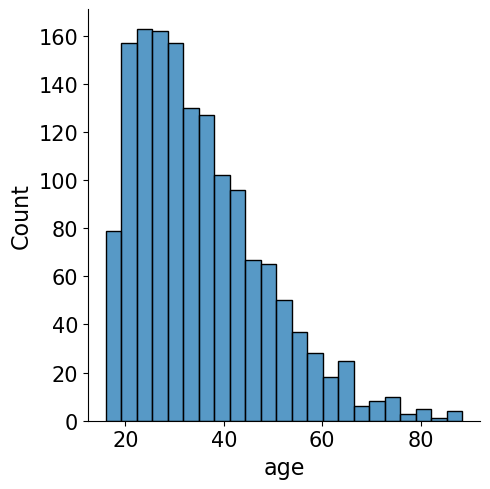

In [107]:
sns.displot(generated_data["age"]);

In [108]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([584, 446, 470]))

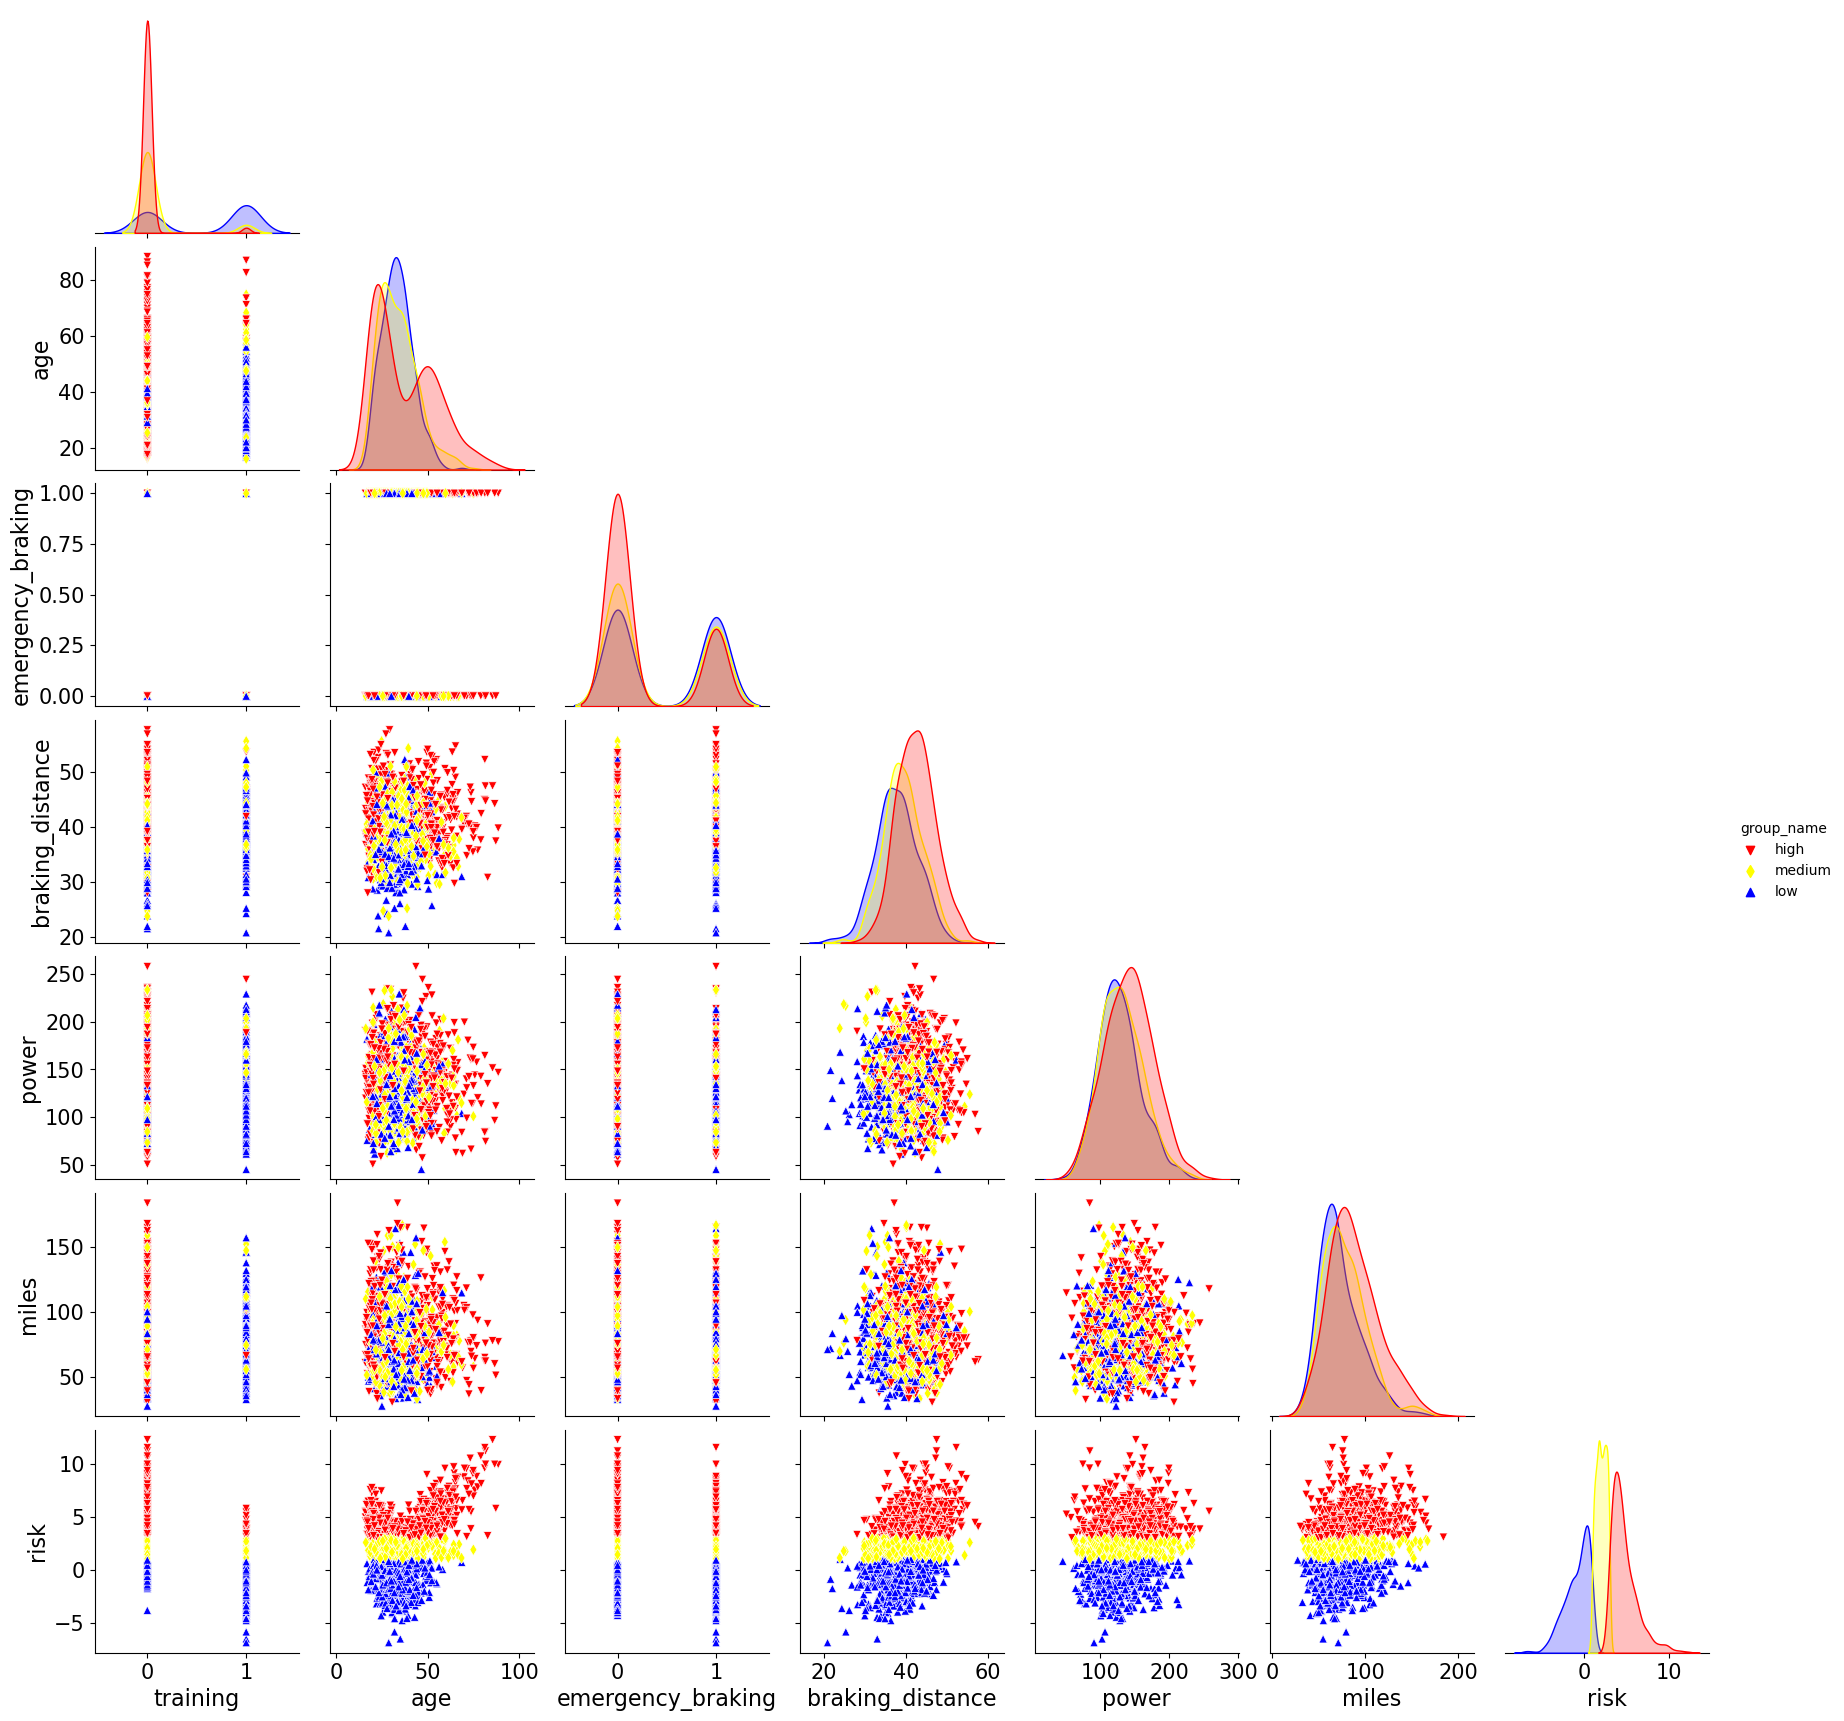

In [109]:
sns.pairplot(generated_data, 
             kind="scatter", 
             diag_kind="kde",
             corner=True, 
             hue='group_name',
             hue_order = ['high', 'medium', 'low'],
             palette=colors, 
             markers=markers,
             vars=features);

In [110]:
# sns.scatterplot?

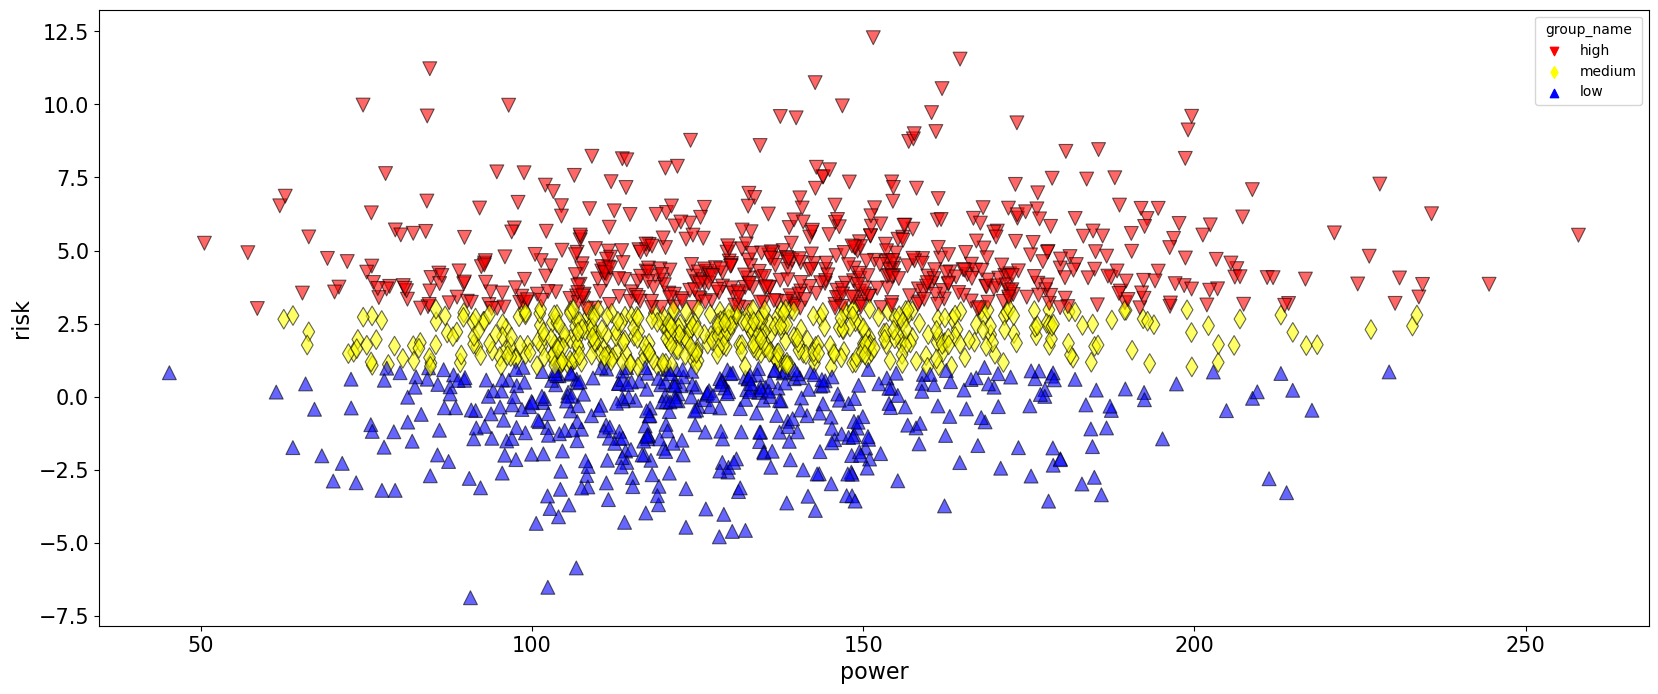

In [111]:
sns.scatterplot(x=generated_data['power'], 
                y=generated_data['risk'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

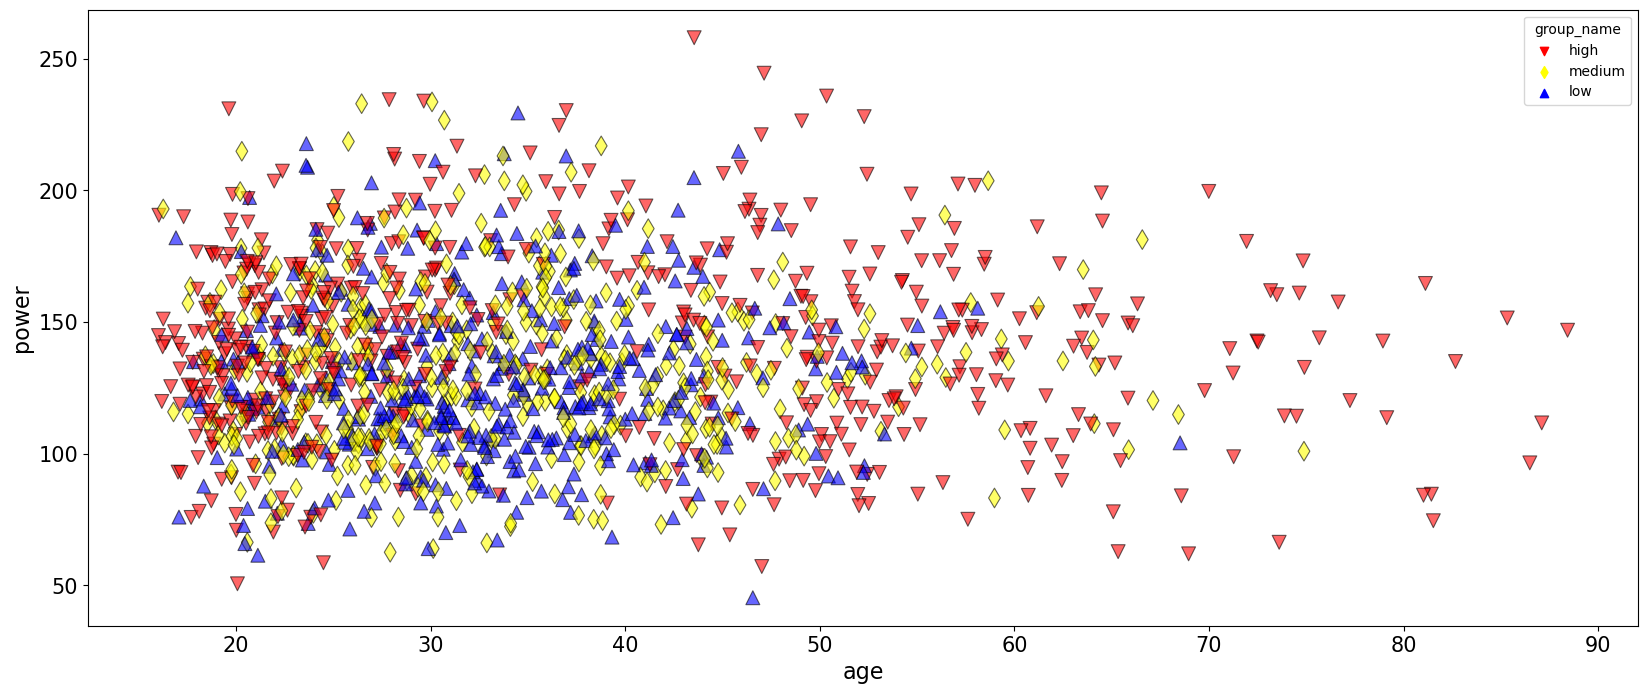

In [112]:
sns.scatterplot(x=generated_data['age'], 
                y=generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [113]:
gen_1 = generated_data

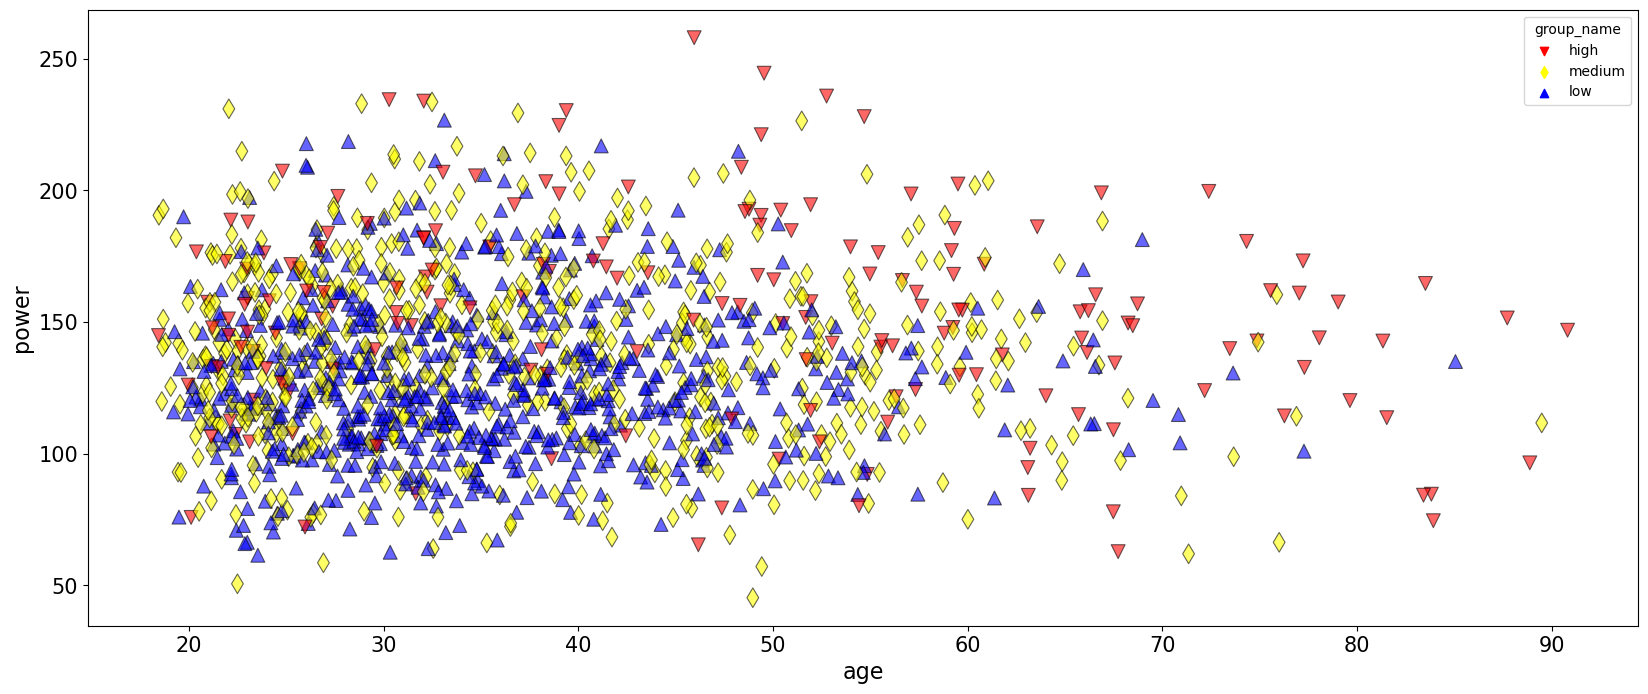

In [114]:
iteration = 24

generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                    age_drift = iteration * 0.1,
                                    emergency_braking_fraction = 0.40 + iteration * 0.02)
sns.scatterplot(x=generated_data['age'], 
                y=generated_data['power'], 
                hue=generated_data['group_name'], 
                hue_order = ['high', 'medium', 'low'],
                palette=colors,  
                style=generated_data['group_name'], 
                style_order = ['high', 'medium', 'low'],
                markers=markers,
                s=100,
                edgecolor='k',
                alpha=0.6
               );

In [115]:
np.unique(generated_data['group_name'], return_counts=True)

(array(['high', 'low', 'medium'], dtype=object), array([181, 728, 591]))

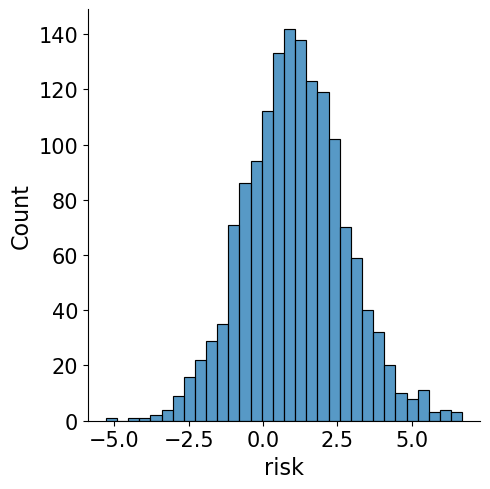

In [116]:
sns.displot(generated_data["risk"]);

In [117]:
generated_data.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    37.640226           0.890667         40.047327   
std       0.405532    13.191571           0.312161          5.292310   
min       0.000000    18.419190           0.000000         20.816722   
25%       0.000000    27.348022           1.000000         36.440032   
50%       0.000000    34.862481           1.000000         39.922413   
75%       0.000000    45.478459           1.000000         43.675832   
max       1.000000    90.825701           1.000000         57.645276   

             power        miles         risk        group  
count  1500.000000  1500.000000  1500.000000  1500.000000  
mean    134.393736    80.415974     1.082802     1.364667  
std      33.410677    25.536882     1.677523     0.687993  
min      45.272791    27.414000    -5.286734     0.000000  
25%     110.333073    61.828411    -0.018726     1.000000  
50%     132.423028    76.275210     1.059273     1.000000  
75%     155.296864    95.114365     2.147257     2.000000  
max     257.983238   183.970662     6.700449     2.000000

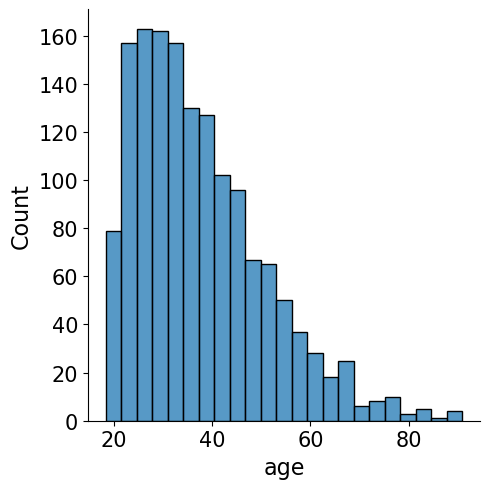

In [118]:
sns.displot(generated_data["age"]);

In [119]:
generated_data["age"].describe()

count    1500.000000
mean       37.640226
std        13.191571
min        18.419190
25%        27.348022
50%        34.862481
75%        45.478459
max        90.825701
Name: age, dtype: float64

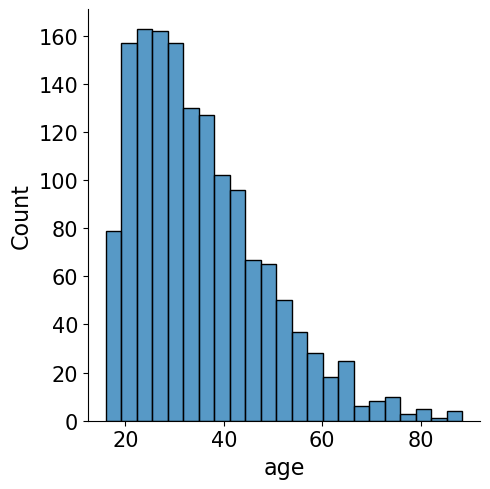

In [120]:
sns.displot(gen_1["age"]);

In [121]:
gen_1["age"].describe()

count    1500.000000
mean       35.240226
std        13.191571
min        16.019190
25%        24.948022
50%        32.462481
75%        43.078459
max        88.425701
Name: age, dtype: float64

# Generating generations of data

In [122]:
def generate_aged_data(iteration):
    assert iteration <= 36
    generated_data = generate_risk_data(driver_weight = 4.0 - iteration * 0.1,
                                        age_drift = iteration * 0.1,
                                        miles_drift = - iteration * 0.5,
                                        seed=iteration,
                                        emergency_braking_fraction = 0.40 + iteration * 0.015)
    return generated_data

In [123]:
!rm *.csv

In [124]:
# first full data set, used for training
reference = generate_aged_data(0)
# all generated data in order of appearance over time, except for the reference
production = None

for iteration in range(1, 37):
    generated_data = generate_aged_data(iteration)
    if production is None:
        production = generated_data.copy()
    else:
        production = production.append(generated_data, ignore_index=True)
    file_name = f'./month-{iteration}.csv'
    generated_data.to_csv(file_name, index=False, sep=';')
    
    
file_name = './reference.csv'
reference.to_csv(file_name, index=False, sep=';')    

# production data does not have gt
production.drop(['risk', 'group_name', 'group'], axis=1, inplace=True)
file_name = f'./production.csv'
production.to_csv(file_name, index=False, sep=';')    

In [125]:
reference.head()

training        age  emergency_braking  braking_distance       power  \
0         0  41.951100                  0         40.933328  122.238329   
1         0  24.368286                  1         44.797317  113.765298   
2         0  18.314649                  1         41.587241  143.427269   
3         0  51.265254                  1         47.266716  111.578133   
4         0  23.578861                  0         42.835319  145.994235   

        miles      risk group_name  group  
0   98.509765  3.700073       high      0  
1   46.324178  2.447873     medium      1  
2   76.862968  4.079834       high      0  
3  102.697069  5.087831       high      0  
4   63.690055  3.739299       high      0

In [126]:
production.head()

training        age  emergency_braking  braking_distance       power  \
0         0  26.667538                  0         47.343239  166.586741   
1         0  39.349117                  0         46.453786   94.661980   
2         0  35.244395                  0         38.405161  127.722213   
3         0  59.458304                  0         36.875965   76.445918   
4         0  17.872899                  1         42.515179  119.443795   

        miles  
0   72.593998  
1   90.019618  
2  100.506092  
3   79.063603  
4   69.482105

In [127]:
reference.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.210000    35.146663           0.394000         39.903294   
std       0.407444    12.765348           0.488798          4.781834   
min       0.000000    15.949545           0.000000         24.368993   
25%       0.000000    25.141921           0.000000         36.733165   
50%       0.000000    32.714683           0.000000         39.867888   
75%       0.000000    42.633629           1.000000         42.938777   
max       1.000000    86.213394           1.000000         56.463472   

             power        miles         risk        group  
count  1500.000000  1500.000000  1500.000000  1500.000000  
mean    134.888089    80.965668     2.183617     0.901333  
std      35.048570    25.496752     2.481164     0.815705  
min      38.246253    18.796953    -5.289352     0.000000  
25%     110.008660    62.666195     0.708085     0.000000  
50%     131.055019    77.094819     2.386835     1.000000  
75%     157.319959    95.568682     3.874869     2.000000  
max     285.750164   211.807417    10.343054     2.000000

In [128]:
production.describe()

training           age  emergency_braking  braking_distance  \
count  54000.000000  54000.000000       54000.000000      54000.000000   
mean       0.201407     37.400236           0.673426         40.014389   
std        0.401055     13.315348           0.468964          5.013877   
min        0.000000     15.942465           0.000000         16.467869   
25%        0.000000     26.929440           0.000000         36.655459   
50%        0.000000     34.753641           1.000000         40.033643   
75%        0.000000     45.250543           1.000000         43.407478   
max        1.000000    102.449286           1.000000         62.946714   

              power         miles  
count  54000.000000  54000.000000  
mean     135.594529     71.689365  
std       35.112533     25.914521  
min       22.598040      5.000000  
25%      110.983195     52.751769  
50%      132.552359     67.981136  
75%      157.197674     86.919400  
max      309.558495    224.643437

In [129]:
assert len(production) == 36 * len(reference)

In [130]:
!ls 

generate-causal.ipynb  month-16.csv  month-23.csv  month-30.csv  month-5.csv
month-1.csv	       month-17.csv  month-24.csv  month-31.csv  month-6.csv
month-10.csv	       month-18.csv  month-25.csv  month-32.csv  month-7.csv
month-11.csv	       month-19.csv  month-26.csv  month-33.csv  month-8.csv
month-12.csv	       month-2.csv   month-27.csv  month-34.csv  month-9.csv
month-13.csv	       month-20.csv  month-28.csv  month-35.csv  production.csv
month-14.csv	       month-21.csv  month-29.csv  month-36.csv  reference.csv
month-15.csv	       month-22.csv  month-3.csv   month-4.csv


In [131]:
!head production.csv

training;age;emergency_braking;braking_distance;power;miles
0;26.667537723387603;0;47.34323870794144;166.58674075149355;72.59399751976754
0;39.3491171976091;0;46.453786337487884;94.66198000522192;90.01961849976509
0;35.244394759836375;0;38.40516059615005;127.72221294141183;100.50609242394675
0;59.458304277674436;0;36.87596512739911;76.44591819383741;79.06360345915685
0;17.87289855308511;1;42.515179440283305;119.44379510936386;69.48210495812629
0;34.79915334882412;1;39.38852009621937;120.22707409327819;92.27317109353025
0;49.13340269653133;0;35.886985296769296;171.35386776130258;61.22810924935726
0;23.296969476443767;0;40.76505008317545;122.96797977296238;94.05066552731641
0;31.554294563624037;0;38.43896261364953;186.8498359604839;62.71528426985459


In [132]:
import pandas as pd

iteration = 36

df = pd.read_csv(f'month-{iteration}.csv', delimiter=';')
df.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.180667    39.438736           0.938667         40.051490   
std       0.384870    13.261725           0.240021          5.072253   
min       0.000000    19.786403           0.000000         22.509900   
25%       0.000000    28.474238           1.000000         36.687131   
50%       0.000000    36.935743           1.000000         40.342817   
75%       0.000000    47.503926           1.000000         43.311050   
max       1.000000    96.931120           1.000000         57.967082   

             power        miles         risk        group  
count  1500.000000  1500.000000  1500.000000  1500.000000  
mean    135.215854    62.765366     0.530821     1.622000  
std      35.950635    25.582015     1.301681     0.539732  
min      26.938595     5.000000    -3.828745     0.000000  
25%     109.462877    43.222911    -0.381861     1.000000  
50%     132.244743    58.121909     0.519117     2.000000  
75%     155.987021    79.320875     1.392502     2.000000  
max     284.698999   175.221602     5.530662     2.000000

# Investigating Drift
* https://evidentlyai.com/blog/data-drift-detection-large-datasets


In [133]:
import evidently

In [134]:
from evidently.analyzers.stattests.jensenshannon import jensenshannon_stat_test
from evidently.analyzers.stattests.kl_div import kl_div_stat_test
from evidently.analyzers.stattests.ks_stattest import ks_stat_test
from evidently.analyzers.stattests.psi import psi_stat_test
from evidently.analyzers.stattests.wasserstein_distance_norm import wasserstein_stat_test

In [135]:
# if the above fails
# !pip install --upgrade --force-reinstall evidently

## Age does drift 

In [136]:
# ks and wasserstein drift shortly after 10

In [137]:
# does not drift
# iteration = 12
# drifted
iteration = 13
generated_data = generate_aged_data(iteration)
wasserstein_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.1191385291393408, drifted=True, actual_threshold=0.1)

In [138]:
# does not drift
# iteration = 10
# drifted
iteration = 11
generated_data = generate_aged_data(iteration)
ks_stat_test(gen_1["age"], generated_data["age"], 'num', threshold=None)

StatTestResult(drift_score=0.0037657665795975317, drifted=True, actual_threshold=0.05)

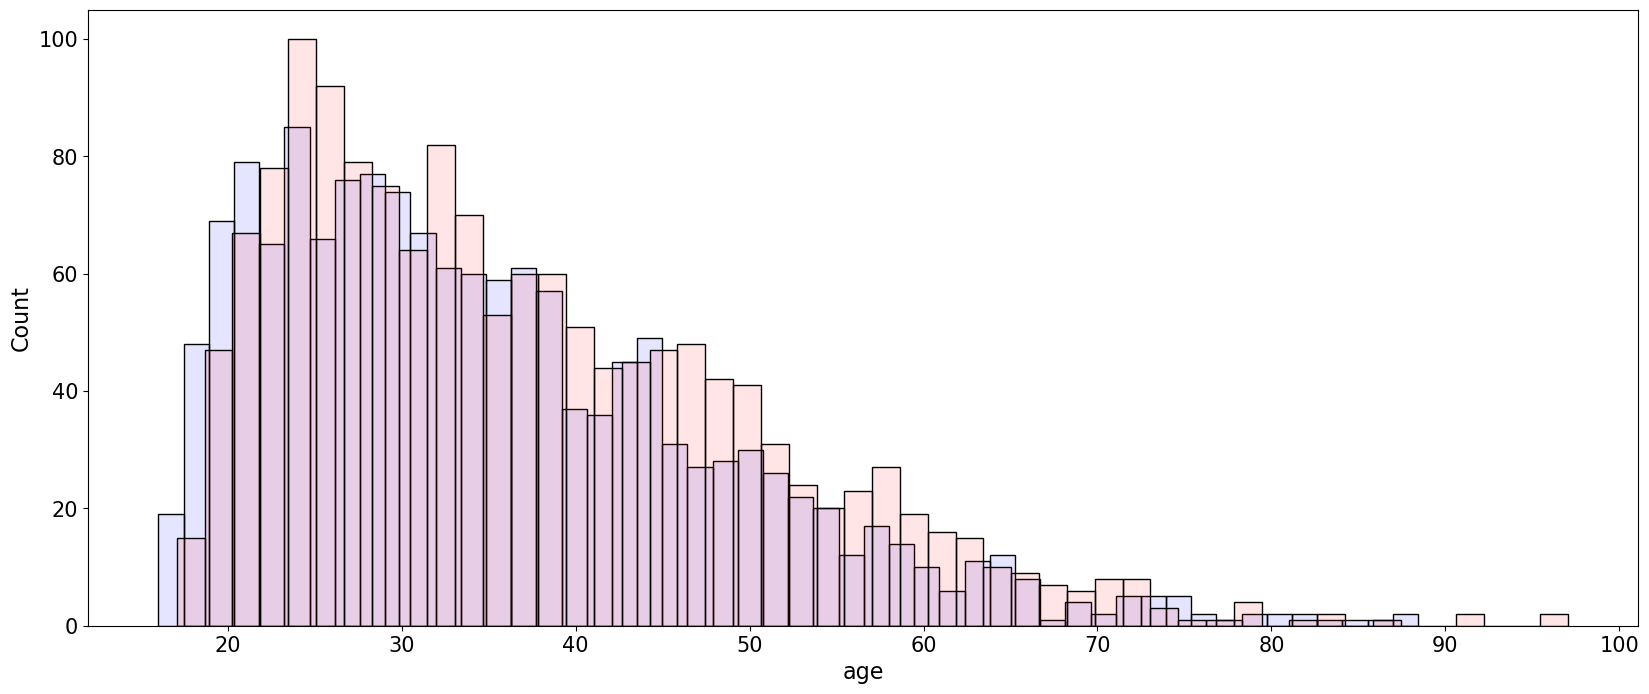

In [139]:
sns.histplot(gen_1["age"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["age"], color='red', bins=50, alpha=0.1);

## Investigating more features

In [140]:
gen_1.describe()

training          age  emergency_braking  braking_distance  \
count  1500.000000  1500.000000        1500.000000       1500.000000   
mean      0.207333    35.240226           0.370000         40.047327   
std       0.405532    13.191571           0.482965          5.292310   
min       0.000000    16.019190           0.000000         20.816722   
25%       0.000000    24.948022           0.000000         36.440032   
50%       0.000000    32.462481           0.000000         39.922413   
75%       0.000000    43.078459           1.000000         43.675832   
max       1.000000    88.425701           1.000000         57.645276   

             power        miles         risk        group  
count  1500.000000  1500.000000  1500.000000  1500.000000  
mean    134.393736    80.415974     2.248167     0.908000  
std      33.410677    25.536882     2.623534     0.823805  
min      45.272791    27.414000    -6.889825     0.000000  
25%     110.333073    61.828411     0.599273     0.000000  
50%     132.423028    76.275210     2.352085     1.000000  
75%     155.296864    95.114365     3.913414     2.000000  
max     257.983238   183.970662    12.286415     2.000000

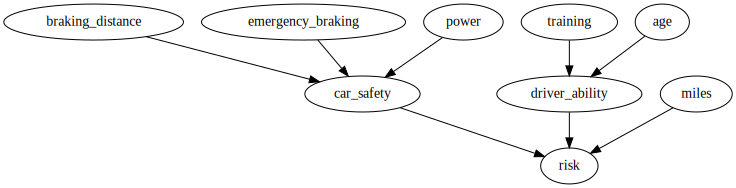

In [141]:
risk_model.cgm.draw()

## Emergy braking feature also does drift

In [142]:
# does not drift
# iteration = 8
# drifted
iteration = 9
generated_data = generate_aged_data(iteration)
jensenshannon_stat_test(gen_1["emergency_braking"], generated_data["emergency_braking"], 'cat', threshold=None)

StatTestResult(drift_score=0.10317547784755317, drifted=True, actual_threshold=0.1)

## Miles drifts very quickly, people drive less

* JS and PSI seem less sensitive and need a clearer drift
* we might also increase the threshold

In [143]:
# KS and Wasserstein detect drift
iteration = 7
# JS and PSI detect drift
iteration = 8
generated_data = generate_aged_data(iteration)

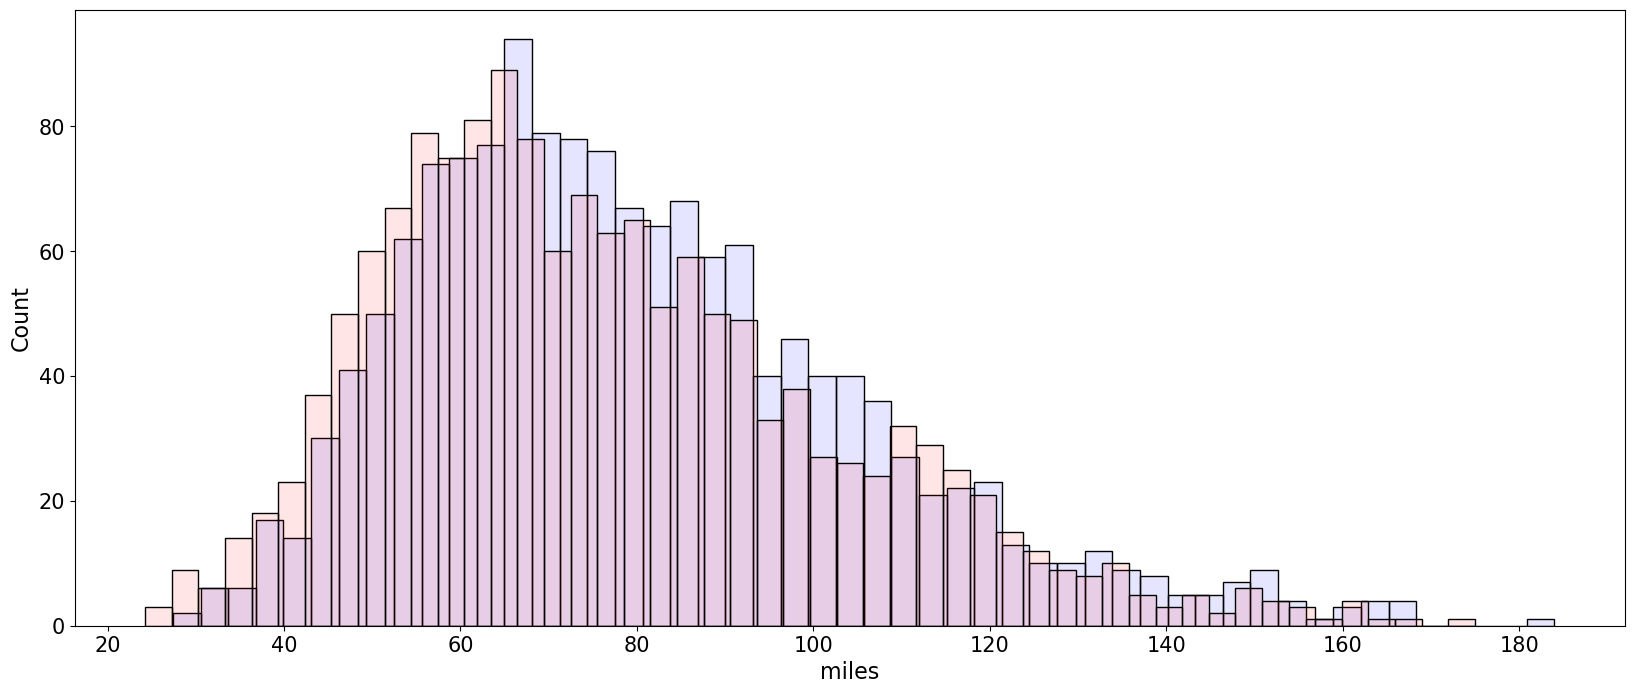

In [144]:
sns.histplot(gen_1["miles"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["miles"], color='red', bins=50, alpha=0.1);

In [145]:
wasserstein_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.14193916918357094, drifted=True, actual_threshold=0.1)

In [146]:
ks_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=4.238115360531035e-05, drifted=True, actual_threshold=0.05)

In [147]:
jensenshannon_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.07439741922388574, drifted=False, actual_threshold=0.1)

In [148]:
psi_stat_test(gen_1["miles"], generated_data["miles"], 'num', threshold=None)

StatTestResult(drift_score=0.04479793303589372, drifted=False, actual_threshold=0.1)

## braking distance does not drift, we only have slight statistical variations

In [149]:
iteration = 36
generated_data = generate_aged_data(iteration)

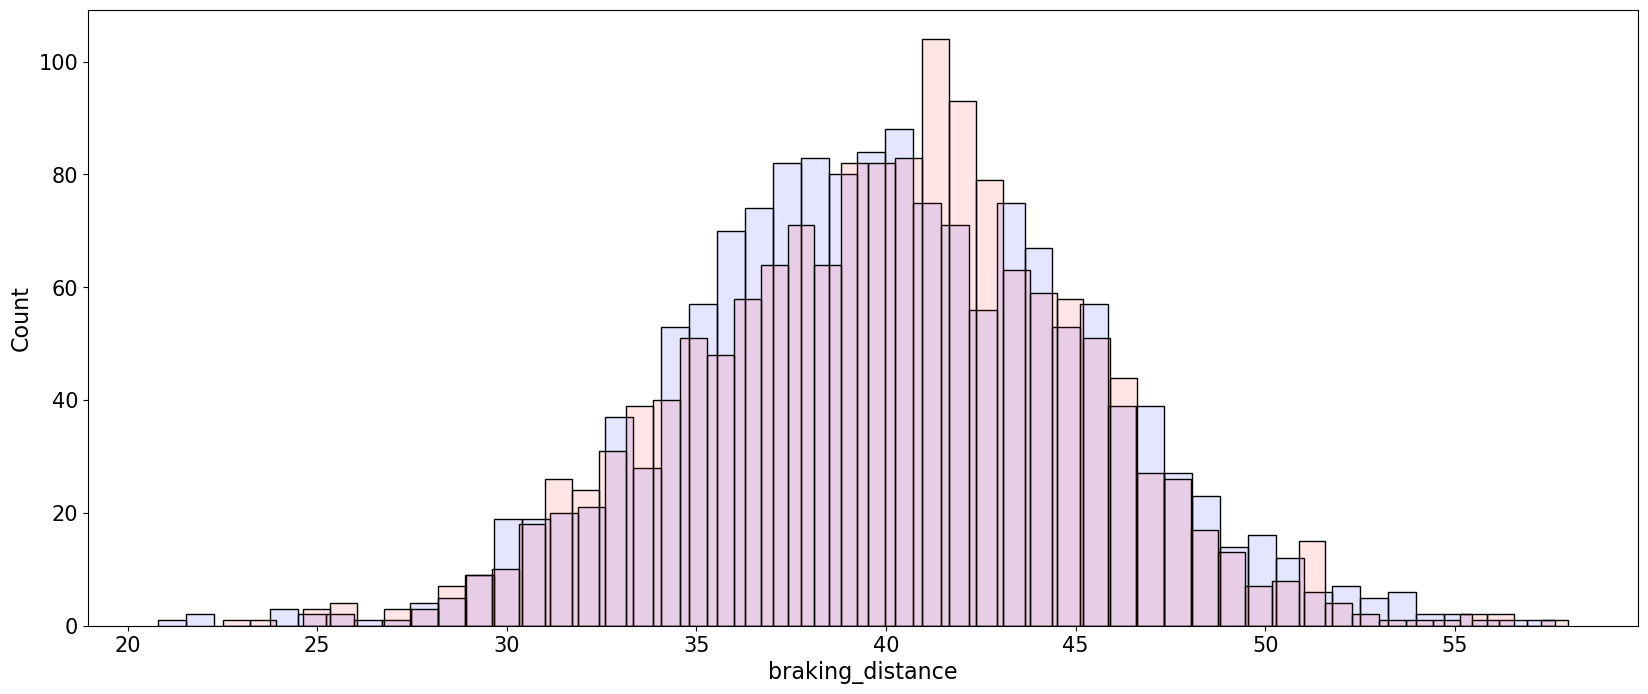

In [150]:
sns.histplot(gen_1["braking_distance"], color='blue', bins=50, alpha=0.1);
sns.histplot(generated_data["braking_distance"], color='red', bins=50, alpha=0.1);

In [151]:
wasserstein_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.0619686940147264, drifted=False, actual_threshold=0.1)

In [152]:
ks_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.19626576377865276, drifted=False, actual_threshold=0.05)

In [153]:
jensenshannon_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.06621168610254012, drifted=False, actual_threshold=0.1)

In [154]:
psi_stat_test(gen_1["braking_distance"], generated_data["braking_distance"], 'num', threshold=None)

StatTestResult(drift_score=0.035779956097353585, drifted=False, actual_threshold=0.1)